# Introduction
Hello my Name is Nurfaldi, I'm a data scientist and today I want to show you how to conduct Analysis on a growth pattern of countries in the world. I would also try to develop Machine learning models to predict Growth of countries. Enjoy!

## Description

### Objective

Growth is one of the most important economic indicators that correlate strongly with improvement on other indicators like income, HDI, Quality of life, Unemployment, and poverty in a country. Predicting the condition that foster economic growth can help a country plan on how to prioritize development and how to decide on policies that maximize prosperity.

In this project, I will try to use regression models to predict growth in countries. We will use several features that in theory are relevant and we will try to see the weight factors on how the features predict growth.

We will also explore the relationship between the features with Exploratory Data Analysis to see if there is any insight that we can take from our data.


### Problem Statement

The main problem that I wanted to answer is how several economic indicators impact a country's growth. To answer this we will try to build machine learning regression models and we will try to compare the weight of each variable. The ideal outcome would be that we can rank the most important factors that affect a country's growth.

#### Data
Our Main dataset can be fetched here:

https://www.kaggle.com/datasets/lewisduncan93/the-economic-freedom-index

# Import Libraries

In [47]:
# Import library

# Standard Python Libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Data Science Libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## Outlier handler
from feature_engine.outliers import Winsorizer

## imputer
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer as sklearnKNNImputer

## Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder as sklearnOneHotEncoder

## Imbalance samplers
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN

## Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

## Machine Learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### For AdaBoost
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

## Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Cross validation
from sklearn.model_selection import cross_val_score

## Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import mglearn

# Model export
import pickle

In [48]:
sns.set_theme(style="whitegrid")

# Data Loading

In [49]:
#import data


df = pd.read_csv('economic_freedom_index2019_data.csv', encoding = 'ISO-8859-1')

#Calling dataframe head and tail
df_head_tail = pd.concat([df.head(3), df.tail(3)])
df_head_tail.T

,0,1,2,183,184,185
CountryID,1,2,3,181,182,183
Country Name,Afghanistan,Albania,Algeria,Yemen,Zambia,Zimbabwe
WEBNAME,Afghanistan,Albania,Algeria,Yemen,Zambia,Zimbabwe
Region,Asia-Pacific,Europe,Middle East and North Africa,Middle East and North Africa,Sub-Saharan Africa,Sub-Saharan Africa
World Rank,152.0,52.0,171.0,NaN,138.0,175.0
Region Rank,39.0,27.0,14.0,NaN,27.0,45.0
2019 Score,51.5,66.5,46.2,NaN,53.6,40.4
Property Rights,19.6,54.8,31.6,19.6,45.0,29.7
Judical Effectiveness,29.6,30.6,36.2,22.2,35.6,24.8
Government Integrity,25.2,40.4,28.9,20.3,32.3,15.8


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryID,186.0,93.500000,53.837719,1.0,47.250,93.50,139.750,186.0
World Rank,180.0,90.500000,52.105662,1.0,45.750,90.50,135.250,180.0
Region Rank,180.0,20.538889,12.738611,1.0,9.750,19.50,31.000,47.0
2019 Score,180.0,60.768333,11.255725,5.9,53.950,60.75,67.800,90.2
Property Rights,185.0,52.327568,19.608526,7.6,37.000,50.10,65.900,97.4
Judical Effectiveness,185.0,44.899459,18.104745,5.0,31.000,42.90,54.700,92.4
Government Integrity,185.0,41.470270,19.793193,7.9,27.200,35.50,50.300,96.7
Tax Burden,180.0,77.212778,13.208314,0.0,70.975,78.05,85.425,99.8
Gov't Spending,183.0,64.203825,23.150984,0.0,51.700,68.80,82.600,96.6
Fiscal Health,183.0,65.996721,31.764160,0.0,39.900,80.30,91.450,100.0


In [51]:
df.shape

(186, 34)

The data is only 186 rows, which is a litte bit small for machine learning model.

In [52]:
#Duplicate data for backup
df_copy = df.copy()

# Exploratory Data Analysis (EDA)

## Cleaning

In [53]:
#Listing all columns
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

The country names seems to be a bit difficult to work with in python, lets simplify those

In [54]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace("[),]","", regex=True)
df.columns = df.columns.str.replace("(","in_", regex=False)
df.columns = df.columns.str.replace("%","percent")

df.columns

Index(['countryid', 'country_name', 'webname', 'region', 'world_rank',
       'region_rank', '2019_score', 'property_rights', 'judical_effectiveness',
       'government_integrity', 'tax_burden', 'gov't_spending', 'fiscal_health',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom', 'financial_freedom',
       'tariff_rate_in_percent', 'income_tax_rate_in_percent',
       'corporate_tax_rate_in_percent', 'tax_burden_percent_of_gdp',
       'gov't_expenditure_percent_of_gdp', 'country', 'population_in_millions',
       'gdp_in_billions_ppp', 'gdp_growth_rate_in_percent',
       '5_year_gdp_growth_rate_in_percent', 'gdp_per_capita_in_ppp',
       'unemployment_in_percent', 'inflation_in_percent',
       'fdi_inflow_in_millions', 'public_debt_in_percent_of_gdp'],
      dtype='object')

We still see some oddities lets, handle those

In [55]:
df.rename(columns = {"gov't_expenditure_percent_of_gdp":'gov_Expenditure_percent_of_GDP', 
                     "gov't_spending":'gov_spending'},
          inplace = True)

In [56]:
df.columns

Index(['countryid', 'country_name', 'webname', 'region', 'world_rank',
       'region_rank', '2019_score', 'property_rights', 'judical_effectiveness',
       'government_integrity', 'tax_burden', 'gov_spending', 'fiscal_health',
       'business_freedom', 'labor_freedom', 'monetary_freedom',
       'trade_freedom', 'investment_freedom', 'financial_freedom',
       'tariff_rate_in_percent', 'income_tax_rate_in_percent',
       'corporate_tax_rate_in_percent', 'tax_burden_percent_of_gdp',
       'gov_Expenditure_percent_of_GDP', 'country', 'population_in_millions',
       'gdp_in_billions_ppp', 'gdp_growth_rate_in_percent',
       '5_year_gdp_growth_rate_in_percent', 'gdp_per_capita_in_ppp',
       'unemployment_in_percent', 'inflation_in_percent',
       'fdi_inflow_in_millions', 'public_debt_in_percent_of_gdp'],
      dtype='object')

Let's check for duplicates

In [57]:
#Checking for duplicated rows
df.duplicated().sum()

0

There is no duplicate in our data, now lets check our data types

In [58]:
df.select_dtypes(include=['object']).columns

Index(['country_name', 'webname', 'region', 'country',
       'population_in_millions', 'gdp_in_billions_ppp',
       'gdp_per_capita_in_ppp', 'unemployment_in_percent',
       'fdi_inflow_in_millions'],
      dtype='object')

In [59]:
#Checking non-null values count and data types. it seems there is some null value and wrong datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   countryid                          186 non-null    int64  
 1   country_name                       186 non-null    object 
 2   webname                            186 non-null    object 
 3   region                             186 non-null    object 
 4   world_rank                         180 non-null    float64
 5   region_rank                        180 non-null    float64
 6   2019_score                         180 non-null    float64
 7   property_rights                    185 non-null    float64
 8   judical_effectiveness              185 non-null    float64
 9   government_integrity               185 non-null    float64
 10  tax_burden                         180 non-null    float64
 11  gov_spending                       183 non-null    float64

It seems that there are still some numerical data in string format, Poupulation, GDP, unemployement and FDI are all numerical indicators. let's fix this

In [60]:
#Listing data with false type
false_type = ['population_in_millions', 'gdp_in_billions_ppp',
       'gdp_per_capita_in_ppp', 'unemployment_in_percent',
       'fdi_inflow_in_millions']    
df[false_type]

,population_in_millions,gdp_in_billions_ppp,gdp_per_capita_in_ppp,unemployment_in_percent,fdi_inflow_in_millions
0,35.5,$69.6,"$1,958",8.8,53.9
1,2.9,$36.0,"$12,507",13.9,"1,119.1"
2,41.5,$632.9,"$15,237",10.0,"1,203.0"
3,28.2,$190.3,"$6,753",8.2,"-2,254.5"
4,44.1,$920.2,"$20,876",8.7,"11,857.0"
...,...,...,...,...,...
181,31.4,$380.7,"$12,114",7.7,-68.0
182,93.6,$647.4,"$6,913",2.1,"14,100.0"
183,30.0,$38.6,"$1,287",14.0,-269.9
184,17.2,$68.9,"$3,996",7.8,"1,091.2"


In [61]:
# Trying to convert the value into numerical
d2 = df[false_type + ['country']].copy()
df_new = d2['country']
exceptions_list = []

for col in false_type:
    d2[col] = d2[col].str.replace("[$,]","", regex=True)
    result = pd.to_numeric(d2[col], errors = 'coerce')
    df_new = pd.concat([df_new, result], axis=1)
    
    exceptions_list = exceptions_list + d2.country[result.isnull()].tolist()
    
exceptions_list = list(set(exceptions_list))

In [62]:
exceptions_list

['Liechtenstein',
 'Libya',
 'Somalia',
 'Cuba',
 'Kiribati',
 'Korea, North ',
 'Dominica',
 'Micronesia',
 'Seychelles',
 'Kosovo',
 'Syria']

After some exploration we can see that there are some values that inputed manually and not in uniform format with the other values, we can try to fix this by setting the values manually based on the table and informations from the internet.

In [63]:
df_exception = d2[d2['country'].isin(exceptions_list)][false_type + ['country']].copy()
df_exception

,population_in_millions,gdp_in_billions_ppp,gdp_per_capita_in_ppp,unemployment_in_percent,fdi_inflow_in_millions,country
42,11.5,148.0,12920,2.6,NaN,Cuba
47,0.1,0.8,11102,NaN,18.9,Dominica
87,0.1,0.2,1976,NaN,1.4,Kiribati
88,25.4,40.0 (2015 est.),1700 (2015 est.),4.8,63.4,"Korea, North"
90,1.9,19.6,10515,NaN,3.6,Kosovo
98,6.4,64.4,9986,17.7,NaN,Libya
99,38000 ppl.,6.1 CHF (2014 ),139100 (2009 est.),2.1 (2016),NaN,Liechtenstein
113,0.1,0.3,3393,NaN,NaN,Micronesia
147,0.1,2.7,28779,NaN,191.9,Seychelles
153,14.3,18.70,NaN,6.0,384.0,Somalia


set values manually, some source are listed in the markdown

In [64]:
#Cuba
df_exception.loc[42][4] = 0 
#Dominica
df_exception.loc[47][3] = 23 #https://dominicanewsonline.com/news/homepage/news/general/dominica-has-third-highest-unemployment-rate-in-caribbean/#:~:text=Dominica%20has%20an%20unemployment%20rate,of%20unemployment%20is%2016%20percent.
#Kiribati
df_exception.loc[87][3] = 8.6 #https://knoema.com/data/kiribati+unemployment#:~:text=Kiribati%20unemployment%20was%20at%20level,by%20our%20digital%20data%20assistant.
#North Korea
df_exception.loc[88][1] = 40
df_exception.loc[88][2] = 1700
#Kosovo
df_exception.loc[90][3] = 29.7 #https://ec.europa.eu/eurostat/statistics-explained/index.php/Enlargement_countries_-_labour_market_statistics#:~:text=Kosovo%20had%20the%20highest%20average,Turkey's%20unemployment%20rate%20was%2013.2%20%25.
#Libya
df_exception.loc[98][4] = -25 #https://www.statista.com/statistics/1238690/value-of-fdi-inflow-in-libya/
#Liechtenstein
df_exception.loc[99][0] = 38000/1000000
df_exception.loc[99][1] = 5.27 #https://currencymatrix.com/convert/6.1-chf-to-usd
df_exception.loc[99][2] = 139100
df_exception.loc[99][3] = 2.1
df_exception.loc[99][4] = -87000 #https://data.worldbank.org/indicator/BX.KLT.DINV.CD.WD?locations=LI
#Micronesia
df_exception.loc[113][3] = 16.2 #https://www.worlddata.info/oceania/micronesia/index.php
df_exception.loc[113][4] = 20.209 #https://data.worldbank.org/indicator/BX.KLT.DINV.CD.WD?locations=FM
#Seychelles
df_exception.loc[147][3] = 2.4 #https://tradingeconomics.com/seychelles/unemployment-rate
#Somalia
df_exception.loc[153][2] = 1236 #https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=SO
#Syria
df_exception.loc[161][1] = 0
df_exception.loc[161][2] = 0
df_exception.loc[161][4] = 0

#recheck values
df_exception[false_type] = df_exception[false_type].apply(pd.to_numeric)
df_exception

,population_in_millions,gdp_in_billions_ppp,gdp_per_capita_in_ppp,unemployment_in_percent,fdi_inflow_in_millions,country
42,11.500,148.00,12920,2.6,0.000,Cuba
47,0.100,0.80,11102,23.0,18.900,Dominica
87,0.100,0.20,1976,8.6,1.400,Kiribati
88,25.400,40.00,1700,4.8,63.400,"Korea, North"
90,1.900,19.60,10515,29.7,3.600,Kosovo
98,6.400,64.40,9986,17.7,-25.000,Libya
99,0.038,5.27,139100,2.1,-87000.000,Liechtenstein
113,0.100,0.30,3393,16.2,20.209,Micronesia
147,0.100,2.70,28779,2.4,191.900,Seychelles
153,14.300,18.70,1236,6.0,384.000,Somalia


We can se that we alredy fix the table lets update the table now

In [65]:
df_new.update(df_exception)

Let's check for dtype to make sure we're good

In [66]:
df.update(df_new)
df[false_type] = df[false_type].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   countryid                          186 non-null    int64  
 1   country_name                       186 non-null    object 
 2   webname                            186 non-null    object 
 3   region                             186 non-null    object 
 4   world_rank                         180 non-null    float64
 5   region_rank                        180 non-null    float64
 6   2019_score                         180 non-null    float64
 7   property_rights                    185 non-null    float64
 8   judical_effectiveness              185 non-null    float64
 9   government_integrity               185 non-null    float64
 10  tax_burden                         180 non-null    float64
 11  gov_spending                       183 non-null    float64

Nice we have all the dtypes right! Now we want to drop redundant columns

In [67]:
df = df.drop(['countryid', 'country_name', 'webname'], axis =1)

Now lets check on missing values

In [68]:
df[df.isnull().any(axis=1)]

,region,world_rank,region_rank,2019_score,property_rights,judical_effectiveness,government_integrity,tax_burden,gov_spending,fiscal_health,...,country,population_in_millions,gdp_in_billions_ppp,gdp_growth_rate_in_percent,5_year_gdp_growth_rate_in_percent,gdp_per_capita_in_ppp,unemployment_in_percent,inflation_in_percent,fdi_inflow_in_millions,public_debt_in_percent_of_gdp
78,Middle East and North Africa,NaN,NaN,NaN,37.0,12.3,20.3,NaN,52.8,13.3,...,Iraq,38.900,658.80,-0.8,4.7,16954.0,8.2,0.1,-5032.4,58.0
88,Asia-Pacific,180.0,43.0,5.9,31.6,5.0,24.4,0.0,0.0,0.0,...,"Korea, North",25.400,40.00,1.1,NaN,1700.0,4.8,NaN,63.4,NaN
98,Middle East and North Africa,NaN,NaN,NaN,7.6,24.4,15.8,NaN,0.0,20.0,...,Libya,6.400,64.40,70.8,-7.9,9986.0,17.7,28.0,-25.0,4.7
99,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Liechtenstein,0.038,5.27,NaN,NaN,139100.0,2.1,NaN,-87000.0,NaN
153,Sub-Saharan Africa,NaN,NaN,NaN,33.7,26.6,7.9,NaN,NaN,NaN,...,Somalia,14.300,18.70,1.8,2.2,1236.0,6.0,NaN,384.0,NaN
161,Middle East and North Africa,NaN,NaN,NaN,37.0,24.4,20.3,NaN,NaN,NaN,...,Syria,18.400,0.00,NaN,NaN,0.0,14.9,NaN,0.0,NaN
183,Middle East and North Africa,NaN,NaN,NaN,19.6,22.2,20.3,NaN,83.7,0.0,...,Yemen,30.000,38.60,-13.8,-16.1,1287.0,14.0,4.9,-269.9,141.0


#### On MIssing Values
Since this is an economic study and in the real world our model should not be given input with missing values, and since the number of rows with missing values is very small and mainly are nations that are in conflict or small, we should fix the data now to avoid problems down the line. 

Since some of the values in our data are metrics made from another institution that we can't calculate on our own, we will use KNNimputer to fill those values based on the other feature's values. 

In [69]:
# Filling missing value with KNNImputer
df_num = df.drop(df.select_dtypes(include=['object']).columns.tolist(), axis=1)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_num_imputed = imputer.fit_transform(df_num)

df_num = pd.DataFrame(df_num_imputed, columns=df_num.columns)
df.update(df_num)


In [70]:
df.isnull().sum()

region                               0
world_rank                           0
region_rank                          0
2019_score                           0
property_rights                      0
judical_effectiveness                0
government_integrity                 0
tax_burden                           0
gov_spending                         0
fiscal_health                        0
business_freedom                     0
labor_freedom                        0
monetary_freedom                     0
trade_freedom                        0
investment_freedom                   0
financial_freedom                    0
tariff_rate_in_percent               0
income_tax_rate_in_percent           0
corporate_tax_rate_in_percent        0
tax_burden_percent_of_gdp            0
gov_Expenditure_percent_of_GDP       0
country                              0
population_in_millions               0
gdp_in_billions_ppp                  0
gdp_growth_rate_in_percent           0
5_year_gdp_growth_rate_in

I think we're done with cleaning the data, let's confirm this one last time

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   region                             186 non-null    object 
 1   world_rank                         186 non-null    float64
 2   region_rank                        186 non-null    float64
 3   2019_score                         186 non-null    float64
 4   property_rights                    186 non-null    float64
 5   judical_effectiveness              186 non-null    float64
 6   government_integrity               186 non-null    float64
 7   tax_burden                         186 non-null    float64
 8   gov_spending                       186 non-null    float64
 9   fiscal_health                      186 non-null    float64
 10  business_freedom                   186 non-null    float64
 11  labor_freedom                      186 non-null    float64

It looks like that our data is ready for explorations!

## Data Types Exploration

We will start by checking every data features for pattern. fist we want to see potential categorical features. We can start by looking at unique values for each column and look for low count unique values. 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   region                             186 non-null    object 
 1   world_rank                         186 non-null    float64
 2   region_rank                        186 non-null    float64
 3   2019_score                         186 non-null    float64
 4   property_rights                    186 non-null    float64
 5   judical_effectiveness              186 non-null    float64
 6   government_integrity               186 non-null    float64
 7   tax_burden                         186 non-null    float64
 8   gov_spending                       186 non-null    float64
 9   fiscal_health                      186 non-null    float64
 10  business_freedom                   186 non-null    float64
 11  labor_freedom                      186 non-null    float64

In [73]:
#Checking Unique Values of every columns
df.nunique().sort_values()

region                                 5
financial_freedom                     12
investment_freedom                    21
corporate_tax_rate_in_percent         40
income_tax_rate_in_percent            51
region_rank                           52
5_year_gdp_growth_rate_in_percent     82
gdp_growth_rate_in_percent            82
inflation_in_percent                  90
government_integrity                  90
tariff_rate_in_percent               103
unemployment_in_percent              109
trade_freedom                        114
property_rights                      129
monetary_freedom                     133
judical_effectiveness                134
population_in_millions               139
2019_score                           143
tax_burden_percent_of_gdp            146
fiscal_health                        150
tax_burden                           152
gov_Expenditure_percent_of_GDP       153
labor_freedom                        156
gov_spending                         159
business_freedom

From the number of unique values and the desciption we can see that all the data are in numerical format except country name and region. the region is the general area where the country is located on the map and country name is unique country identifer name.

Now I let's see unique values in our dataset

In [74]:
#Identifying unique values
unique_val = {}
unique_val_list =[]

for i in df.columns:
    if len(df[i].unique()) <= 21:
        unique_val[i] = df[i].unique()
        unique_val_list.append(i)
        
for key in unique_val:
    print(key, ' : ', unique_val[key])

region  :  ['Asia-Pacific' 'Europe' 'Middle East and North Africa'
 'Sub-Saharan Africa' 'Americas']
investment_freedom  :  [10.  70.  30.  55.  75.  80.  90.  60.  50.  45.  85.  20.  15.  65.
 25.  35.  40.   0.   5.  52.5 95. ]
financial_freedom  :  [10. 70. 30. 40. 60. 90. 80. 50. 20.  0. 45. 25.]


In [75]:
#Spliting numerical and categorical columns
col_cat = ['country', 'region']
col_num = [col for col in df.columns if col not in col_cat]

As we can see the freedom is an index which is numerical and made by some institution. region are split into five categories, 'Asia-Pacific', 'Europe', 'Middle East and North Africa', 'Sub-Saharan Africa' and 'Americas'

In [76]:
#setting numerical, categorical ordinal and categorical nominal columns list
col_cat_ordinal = ['country', 'region']
col_cat_nominal = []

Both feature is ordinal in nature so we can assign those to the fitting columns

## General Analysis

Since we want to focus on growth, lets dive into the variable

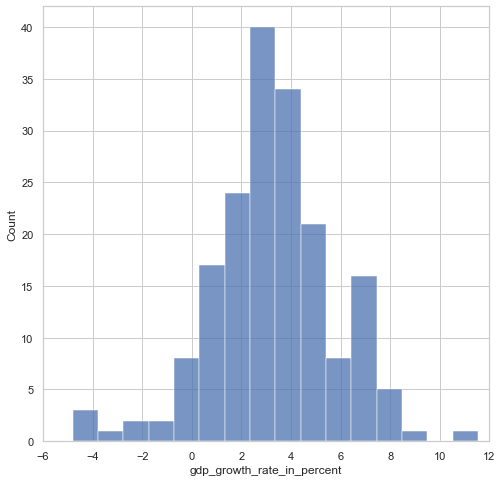

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))
a1 = sns.histplot(data=df, x="gdp_growth_rate_in_percent")
a1.set_xlim(-6,12)
plt.show()

As we can see growth is packed around the value between 0% and 7% for most country, but how is it compare accros regions?

### Regions

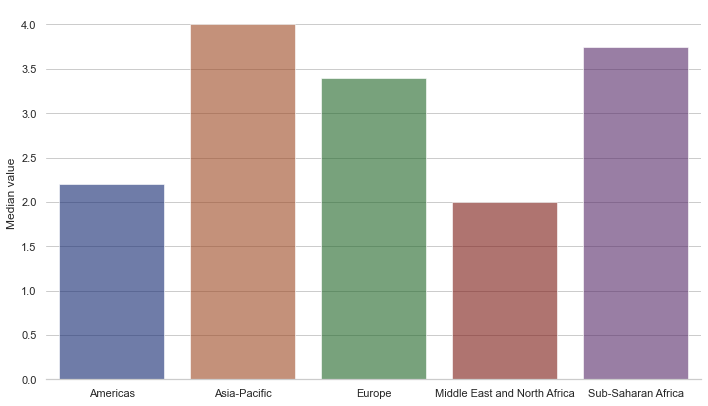

In [78]:
# Percentage dataframe
df_plot = df.groupby(['region']).median().reset_index()
df_plot = df_plot[['region'
                     ]
                    + ['gdp_growth_rate_in_percent']]
df_plot = df_plot.melt(id_vars=['gdp_growth_rate_in_percent'])

# Ploting grouped barchart
g = sns.catplot(
    data=df_plot, kind="bar",
    x="value", y="gdp_growth_rate_in_percent",
    ci="sd", palette="dark", alpha=.6, aspect=10/6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "Median value")

We can see here that Asia pacific, and sub-Saharan Africa had the highest median growth at around 3.6-4.0% compared to other regions. Europe comes close at around 3.4%. Americas and the middle east shows a really low growth at around 2%. but is it the same for mean value?

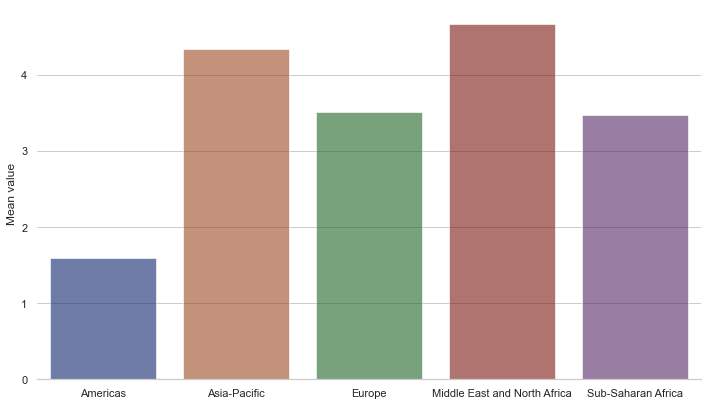

In [79]:
# Percentage dataframe
df_plot = df.groupby(['region']).mean().reset_index()
df_plot = df_plot[['region'
                     ]
                    + ['gdp_growth_rate_in_percent']]
df_plot = df_plot.melt(id_vars=['gdp_growth_rate_in_percent'])

# Ploting grouped barchart
g = sns.catplot(
    data=df_plot, kind="bar",
    x="value", y="gdp_growth_rate_in_percent",
    ci="sd", palette="dark", alpha=.6, aspect=10/6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "Mean value")

Comparing the mean value of growth is interesting. in this plot, the Middle east and north Africa is the region that has the most growth at more than 4% and America have a really low growth at around 1.5%. What caused this?

In [80]:
df.groupby(['region'])['gdp_growth_rate_in_percent'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Americas,32.0,1.587500,3.474492,-14.0,1.000,2.20,3.025,5.4
Asia-Pacific,43.0,4.332558,2.245071,-0.5,2.900,4.00,6.600,9.3
Europe,45.0,3.517778,1.772683,0.0,2.400,3.40,4.300,7.8
Middle East and North Africa,18.0,4.661111,17.007581,-13.8,-0.100,2.00,3.275,70.8
Sub-Saharan Africa,48.0,3.477083,3.013180,-4.6,2.425,3.75,5.225,10.9


As we can see from the table, the Middle East and North Africa region shows outlier with max growth of 70 and relatively low country count at 18, this caused mean to be dragged more to a bigger value. Americas on the other hand includes a country with -14 growth that can pull the mean towards the lower end. this insight warned us that outliers can affect growth prediction so much.

Now lets make a column to split the growh rate into some categories

In [81]:
#Setting up bins for growth rate level
dfa = df.copy()

gdp_growth_rate_in_percent_min = dfa['gdp_growth_rate_in_percent'].quantile(q=0)
gdp_growth_rate_in_percent_25 = dfa['gdp_growth_rate_in_percent'].quantile(q=.25)
gdp_growth_rate_in_percent_50 = dfa['gdp_growth_rate_in_percent'].quantile(q=.5)
gdp_growth_rate_in_percent_75 = dfa['gdp_growth_rate_in_percent'].quantile(q=.75)
gdp_growth_rate_in_percent_max = dfa['gdp_growth_rate_in_percent'].quantile(q=1)

gdp_growth_rate_in_percent_edges = (gdp_growth_rate_in_percent_min, gdp_growth_rate_in_percent_25, gdp_growth_rate_in_percent_50, gdp_growth_rate_in_percent_75, gdp_growth_rate_in_percent_max)

gdp_growth_rate_in_percent_group_name = ('low','mid-low','mid-high','high')

gdp_growth_rate_in_percent_edges, gdp_growth_rate_in_percent_group_name

((-14.0, 1.825, 3.2, 4.75, 70.8), ('low', 'mid-low', 'mid-high', 'high'))

In [82]:
#defining plot function
def plot_bins(col):    
    dfa['gdp_growth_rate_in_percent_group'] = pd.cut(dfa['gdp_growth_rate_in_percent'], 
                                                    gdp_growth_rate_in_percent_edges, 
                                                    labels=gdp_growth_rate_in_percent_group_name)

    dfa_plot = dfa.groupby('gdp_growth_rate_in_percent_group')[col].median()

    locations = [1,2,3,4]
    heights = []
    labels = gdp_growth_rate_in_percent_group_name

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.bar(locations, dfa_plot, tick_label=labels, alpha=.8)
    plt.title('Average '+ col + '\n in each growth rate level')
    plt.xlabel('gdp_growth_rate_in_percent')
    plt.ylabel(col);
    
#distribution plot
def distribution_plot(col, outlier_filter=0):
    
    df_dis = dfa[(dfa[col] >= dfa[col].quantile(q=outlier_filter)) &
                        (dfa[col] <= dfa[col].quantile(q=1-outlier_filter))]
    
    plt.figure(figsize=(8, 6))
    ax = sns.violinplot(x="gdp_growth_rate_in_percent_group", y=col, data=df_dis, dodge=False,
                        alpha=.6, scale="width", inner=None)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

    sns.boxplot(x="gdp_growth_rate_in_percent_group", y=col, data=df_dis, saturation=1, showfliers=False,
                width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax
               
               )
    old_len_collections = len(ax.collections)
    sns.stripplot(x="gdp_growth_rate_in_percent_group", y=col, data=df_dis, dodge=False, ax=ax
                 
                 )
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show();

From now on we will use quartiles bracket as bins for growth rate level. for example Q0 - Q1 will be our low category, Q1 to Q2 would be our mid-low category and so on and so forth.

The quartiles for each bins are (Min, Q1, Median, Q3, Max):
(-14.0, 1.825, 3.2, 4.75, 70.8)

## Growth Group and Distributions 

From the bins that we made earlier, we can plot the median values for selected columns in each bin. We would also plot the distribution and the boxplot of each bin by our selected columns 

### GDP per Capita

GDP per capita is a measure of GDP divided by population number. It generally shows how prosperous a country is in terms of production and thus income (because income is highly correlated with productivity). 

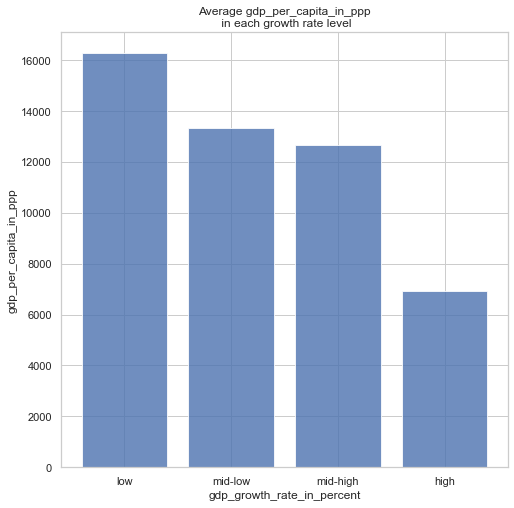

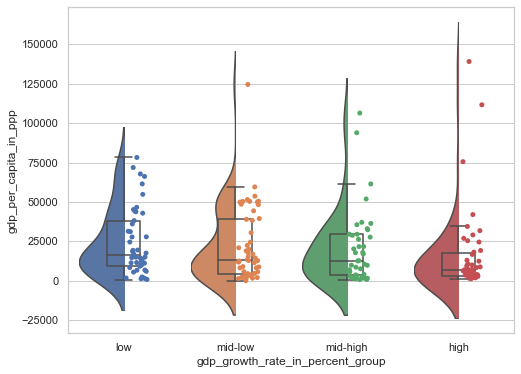

In [84]:
col = 'gdp_per_capita_in_ppp'
plot_bins(col)
distribution_plot(col)

Looking at the graph we can see a negative correlation in Growth vs GDP per capita. A country with lower growth tends to have a higher GDP per capita. This makes sense because a more developed country would find that it is more difficult to grow because of a more mature infrastructure and economy. low-income countries, on the other hand, have so much more to improve and if they play it right the growth potential is much higher than high-income countries.   


### Debt

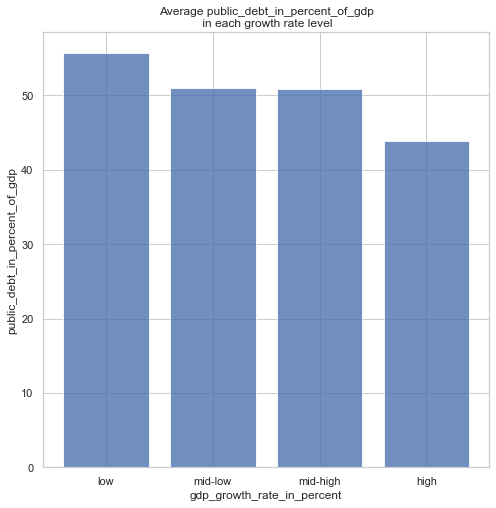

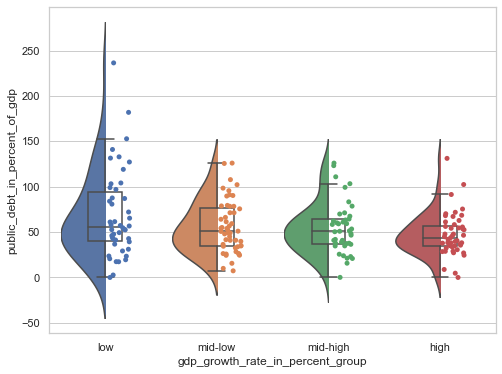

In [85]:
col = 'public_debt_in_percent_of_gdp'
plot_bins(col)
distribution_plot(col)

In terms of debt, the pattern is very similar to GDP per capita but with a more normal distribution for each bin. High-growth countries tend to have a higher debt than lower-growth countries. this can be traced to prosperity since low-growth countries tend to be richer, have higher credit ratings, and are easier to get lower interest debt. Higher-income countries also tend to run a budget deficit, which caused them to borrow more.  

### Inflation

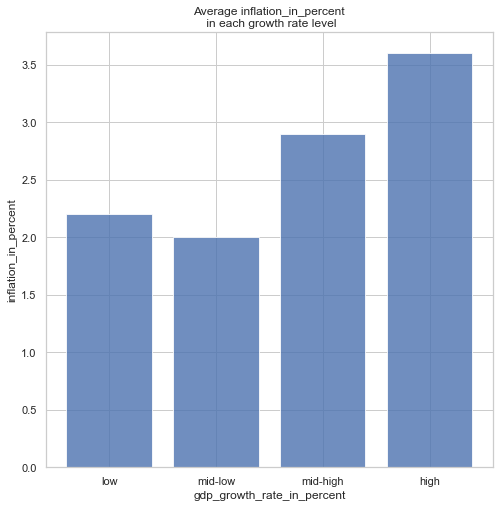

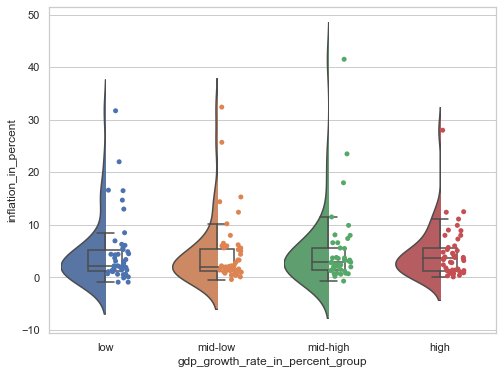

In [86]:
col = 'inflation_in_percent'
plot_bins(col)
distribution_plot(col)### Debt

In terms of inflation, the pattern is reversed from GDP per capita. Higher growth counties seem to have higher inflation than lower growth countries. Inflation and growth usually go hand in hand. this is because inflation usually drives consumption (fewer people are saving because their savings would get relatively smaller in the future). Consumption drives production, and if production increases it is the definition of growth.

### Foreign Direct Investment

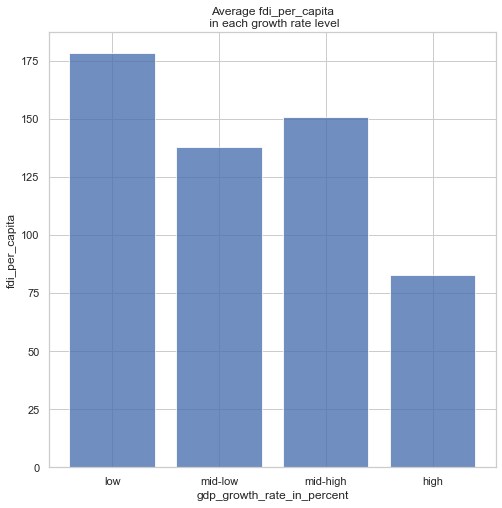

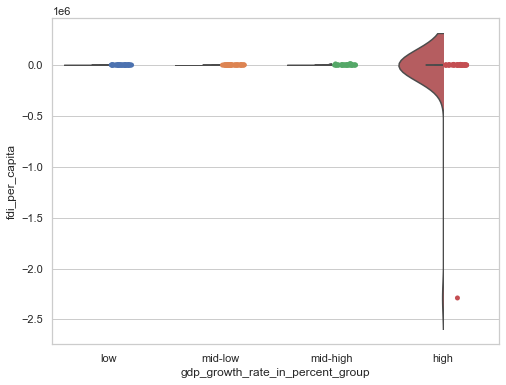

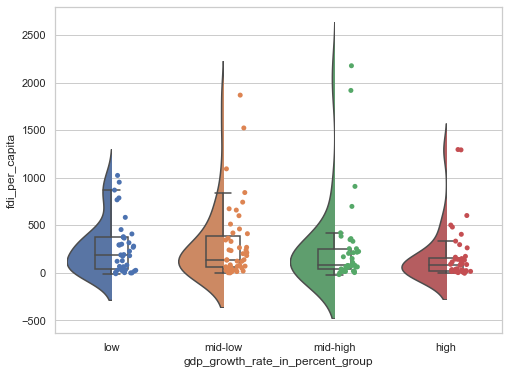

In [87]:
dfa['fdi_per_capita'] = dfa['fdi_inflow_in_millions'] / dfa['population_in_millions']
col = 'fdi_per_capita'
plot_bins(col)
distribution_plot(col, outlier_filter=0)
distribution_plot(col, outlier_filter=0.05)

The Investment data is very interesting because people might expect investors to invest in higher-growth county, but FDI per capita is actually negatively correlated to growth. It seems that investors in the year the data is taken prefer to have a saver investment in more stable richer low growth countries.

### Expenditure

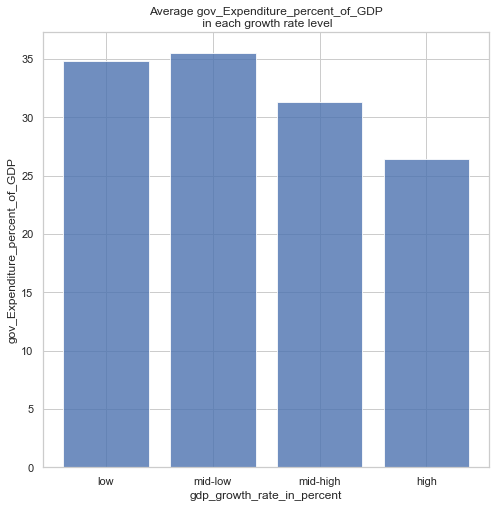

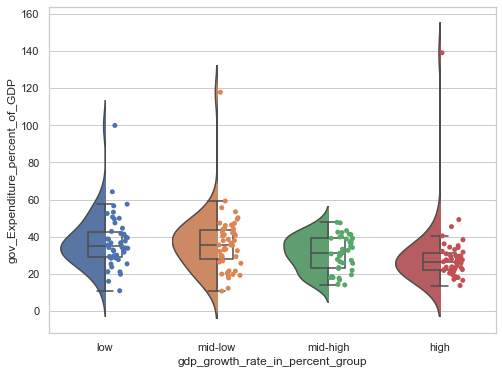

In [88]:
col = 'gov_Expenditure_percent_of_GDP'
plot_bins(col)
distribution_plot(col)

The expenditure of lower growth and mid-low growth countries is higher than higher growth countries, this makes sense because lower growth countries which are richer, have more budget to spend.

### Unemployment

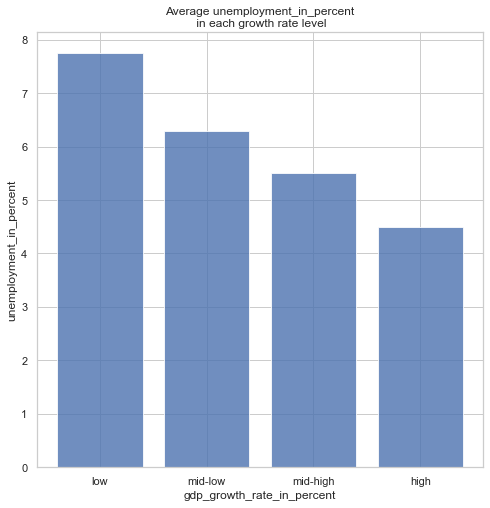

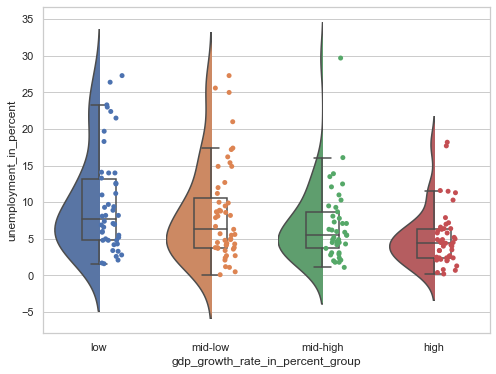

In [89]:
col = 'unemployment_in_percent'
plot_bins(col)
distribution_plot(col)

The unemployment data can be intuitive yet surprising for some people. growth is negatively correlated with unemployment (which is a good thing because lower unemployment is better). on the other hand, we already know that countries with lower growth tend to be richer than countries with higher growth. It seems that the correlation between unemployment and growth is stronger than unemployment with GDP per capita.  

### Population

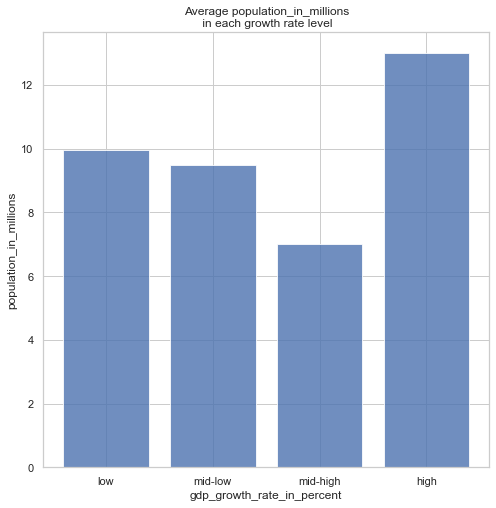

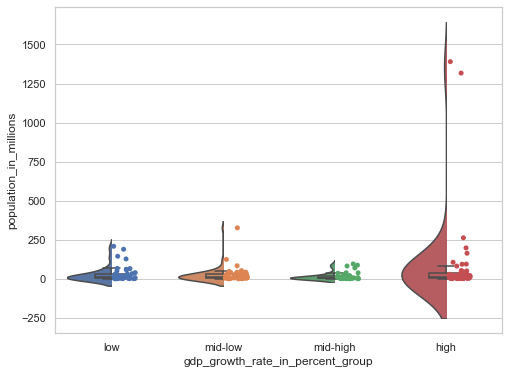

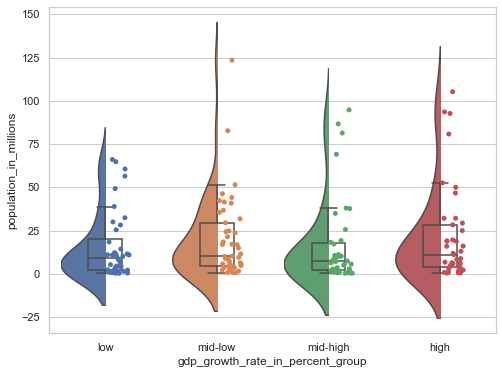

In [91]:
col = 'population_in_millions'
plot_bins(col)
distribution_plot(col, outlier_filter=0)
distribution_plot(col, outlier_filter=0.05)

The last one on the list is population data. Growth seems to be positively correlated with population. This is mainly because most developing countries are located in Africa, Asia, and South America which generally have more population than richer countries in Europe and North America.

We can also see two countries that look like outliers in the top distribution plot. this should be China and India, the two most populous countries in the world with more than 1.2 billion people each 

## Corellation

<AxesSubplot:>

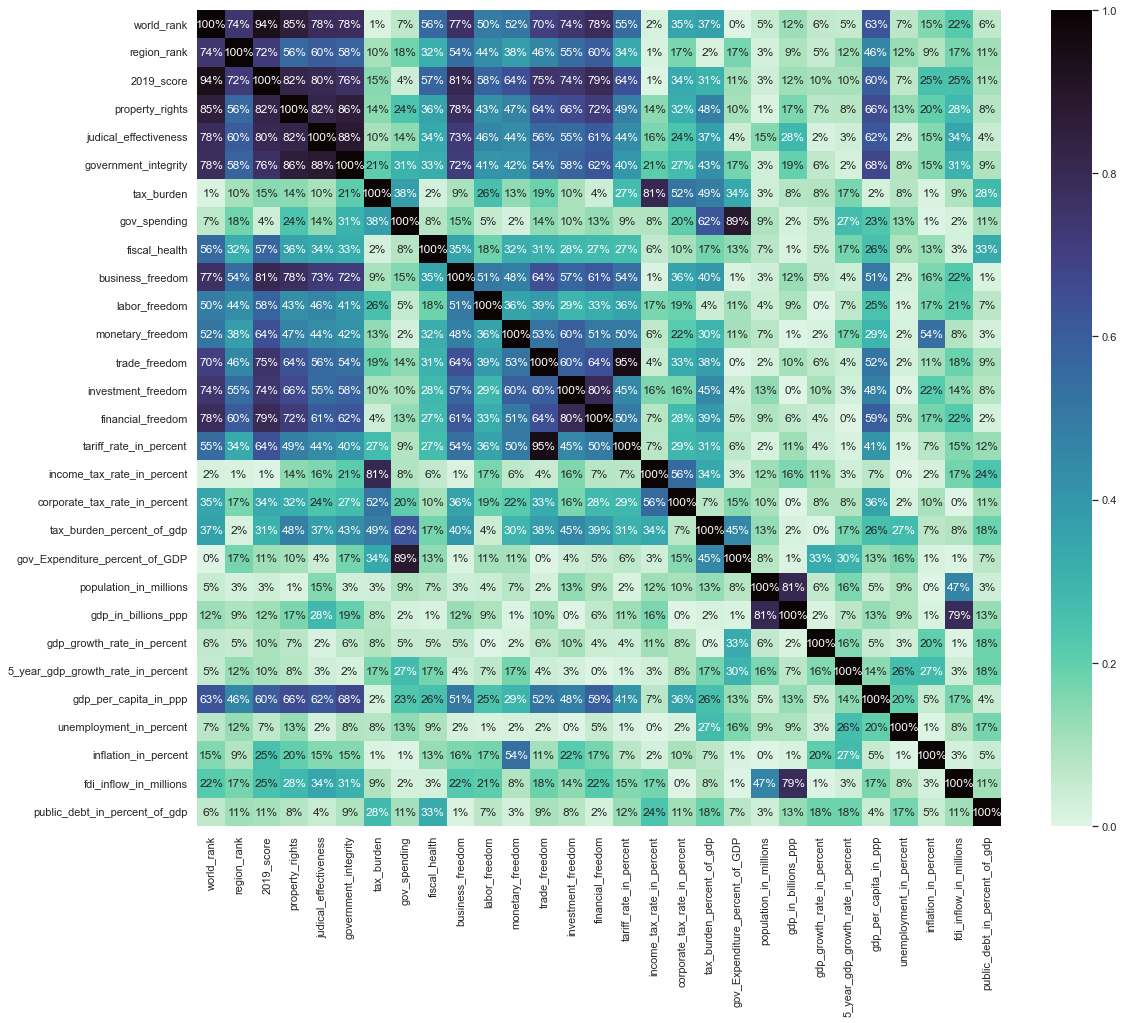

In [92]:
#Exploring corellation
cor_matrix = df.corr().abs()

plt.figure(figsize = (18,15))
sns.heatmap(cor_matrix, annot=True, fmt=".0%", vmin=0, vmax=1, cmap="mako_r")

From the plot, we can see that gov_expenditure have the strongest corellation to growth. inflation, debt, and unemployement are also shown to have a high corellation especially to 5 year growth. this is makes sense because countries with high growth are usually low income developing countries that have more unemployment and debt problems. 

## Column Patterns

Now we want to detect the pattern of each columns and whether there are outliers and the types of outliers for each features. We also want to see if the features are normally distributed or not. this will be beneficial for outlier handling later and to gain insight into the data.

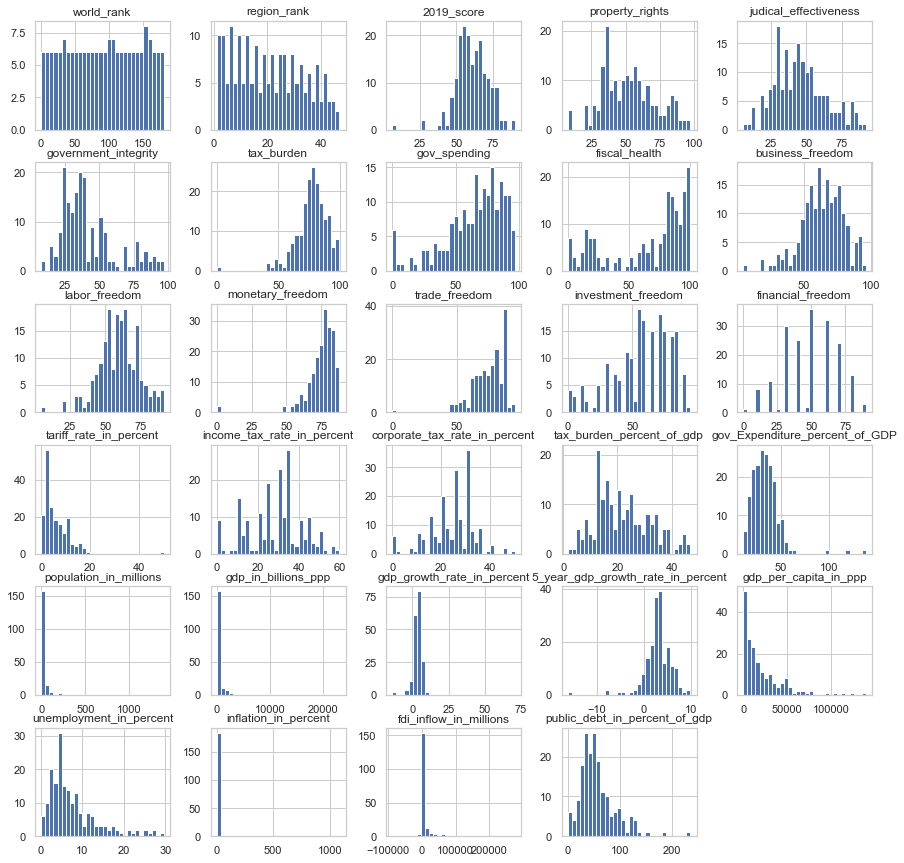

In [93]:
#plotting histogram for every numerical column
df.hist(bins=30, figsize=(15, 15));

In [94]:
#skew for each column
for column in df.select_dtypes(include=np.number).columns: 
    print(column, 'Skewness Value : ', df[column].skew())

world_rank Skewness Value :  -0.026542471718821892
region_rank Skewness Value :  0.22144072264271683
2019_score Skewness Value :  -0.5921103535136976
property_rights Skewness Value :  0.21854729689051244
judical_effectiveness Skewness Value :  0.4454032832385776
government_integrity Skewness Value :  1.0865692857291116
tax_burden Skewness Value :  -1.4631187216141226
gov_spending Skewness Value :  -1.0221144258345851
fiscal_health Skewness Value :  -0.8098088097830326
business_freedom Skewness Value :  -0.6043135235483209
labor_freedom Skewness Value :  -0.3498738285075947
monetary_freedom Skewness Value :  -3.5726177812717026
trade_freedom Skewness Value :  -1.6074713383088777
investment_freedom Skewness Value :  -0.7066342035091705
financial_freedom Skewness Value :  -0.10561230076892125
tariff_rate_in_percent Skewness Value :  3.2387009245815235
income_tax_rate_in_percent Skewness Value :  -0.23393571998541599
corporate_tax_rate_in_percent Skewness Value :  -0.49734325814804503
tax_

In [95]:
#seperating by skewness
col_num_normal = [] 
col_num_skewed = []
col_num_skewed_extreme = []

for column in col_num:
    if abs(df[column].skew()) > 1:
        col_num_skewed_extreme.append(column)
    elif abs(df[column].skew()) > 0.5:
        col_num_skewed.append(column)
    else:
        col_num_normal.append(column)
        

print('extremely skewed: ', col_num_skewed_extreme) 
print('skewed:', col_num_skewed)
print('normal:', col_num_normal)

extremely skewed:  ['government_integrity', 'tax_burden', 'gov_spending', 'monetary_freedom', 'trade_freedom', 'tariff_rate_in_percent', 'gov_Expenditure_percent_of_GDP', 'population_in_millions', 'gdp_in_billions_ppp', 'gdp_growth_rate_in_percent', '5_year_gdp_growth_rate_in_percent', 'gdp_per_capita_in_ppp', 'unemployment_in_percent', 'inflation_in_percent', 'fdi_inflow_in_millions', 'public_debt_in_percent_of_gdp']
skewed: ['2019_score', 'fiscal_health', 'business_freedom', 'investment_freedom']
normal: ['world_rank', 'region_rank', 'property_rights', 'judical_effectiveness', 'labor_freedom', 'financial_freedom', 'income_tax_rate_in_percent', 'corporate_tax_rate_in_percent', 'tax_burden_percent_of_gdp']


As we can see from the histogram and the skewness calculation many of the columns are extremely skewed.

next we want to define function to plot histograms and boxplots for each feature to detect outliers

In [96]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

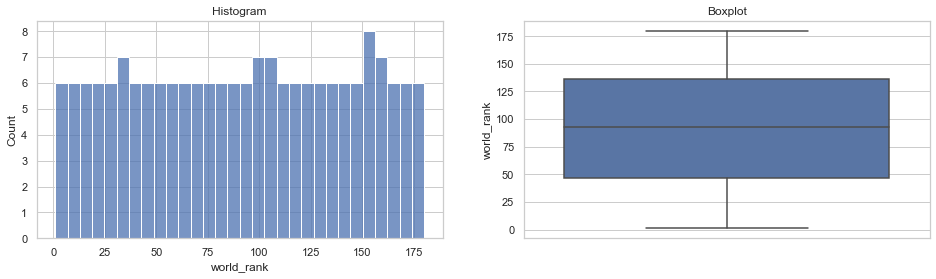


Skewness Value :  -0.026542471718821892


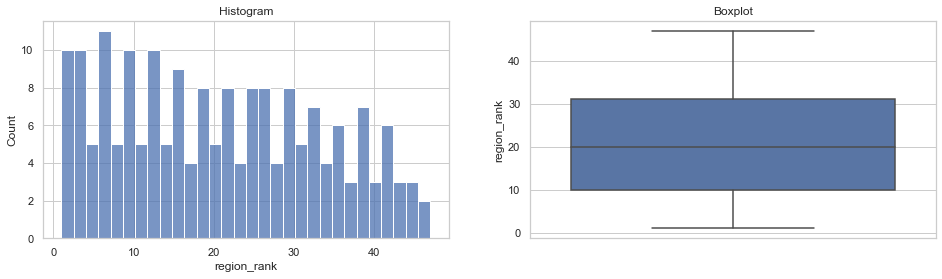


Skewness Value :  0.22144072264271683


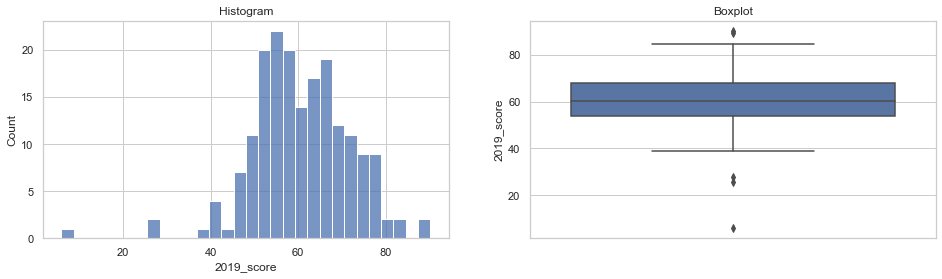


Skewness Value :  -0.5921103535136976


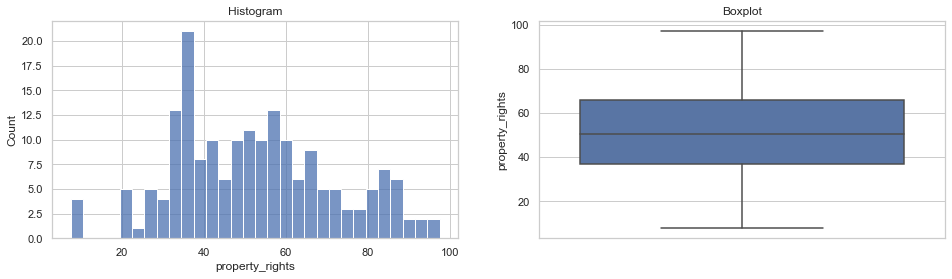


Skewness Value :  0.21854729689051244


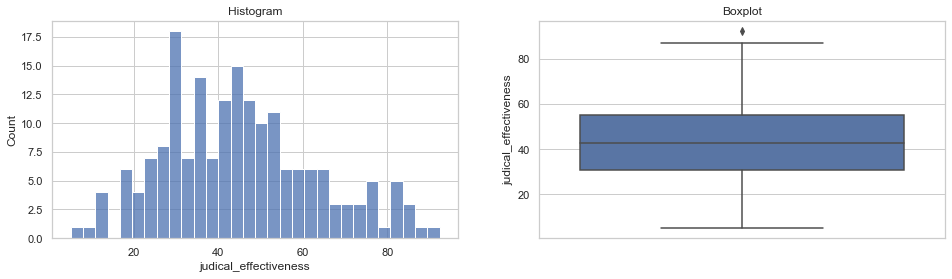


Skewness Value :  0.4454032832385776


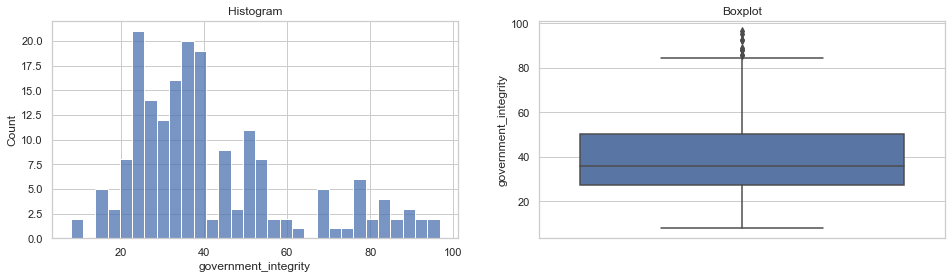


Skewness Value :  1.0865692857291116


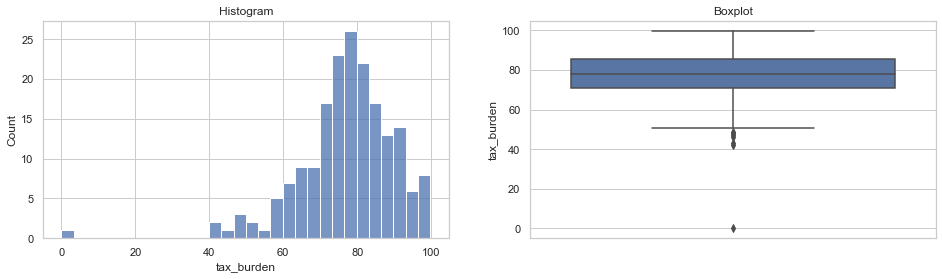


Skewness Value :  -1.4631187216141226


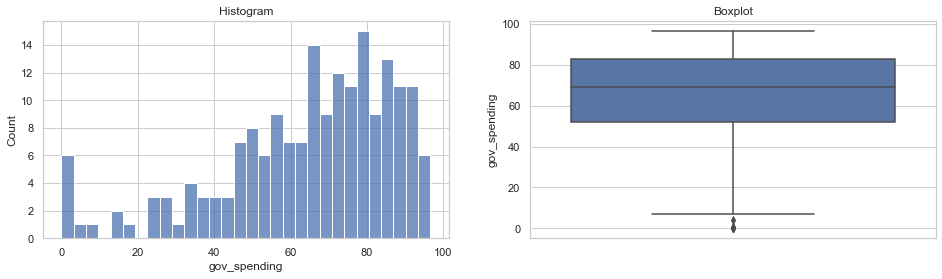


Skewness Value :  -1.0221144258345851


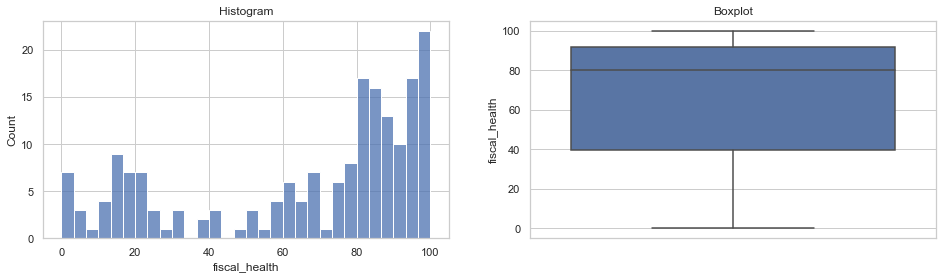


Skewness Value :  -0.8098088097830326


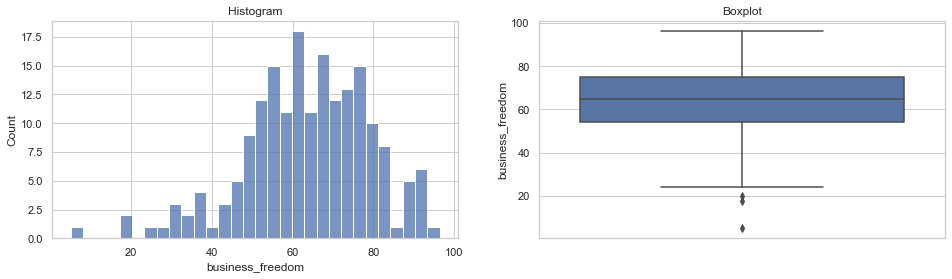


Skewness Value :  -0.6043135235483209


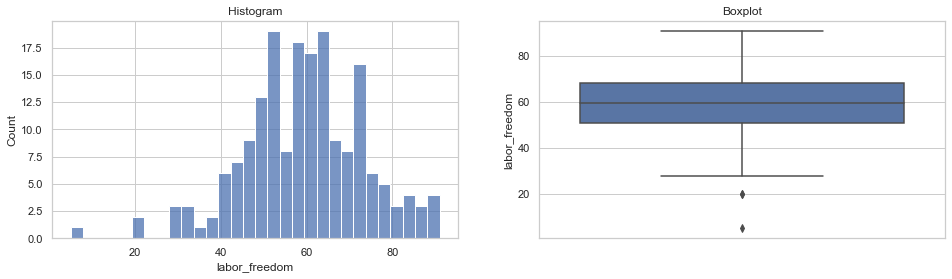


Skewness Value :  -0.3498738285075947


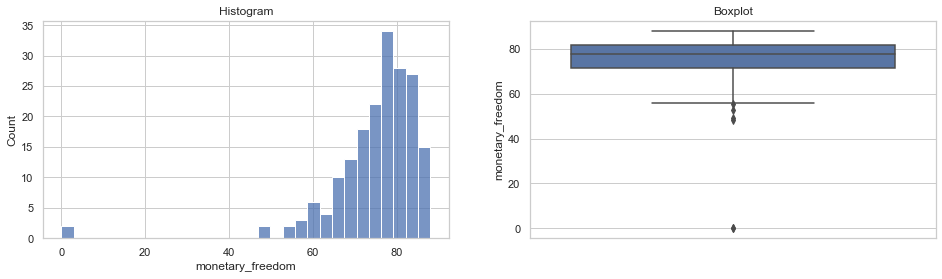


Skewness Value :  -3.5726177812717026


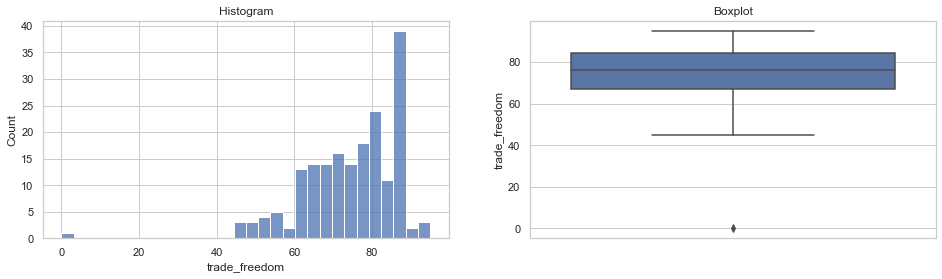


Skewness Value :  -1.6074713383088777


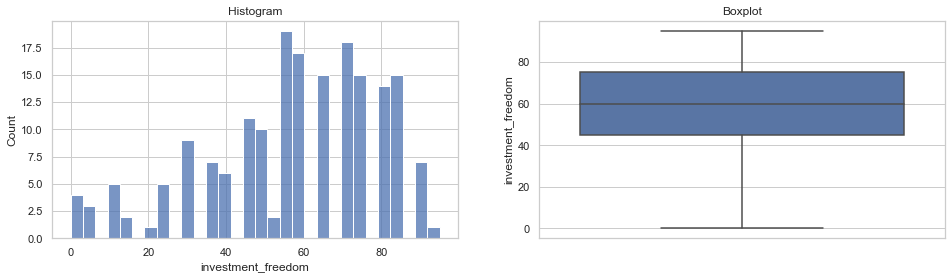


Skewness Value :  -0.7066342035091705


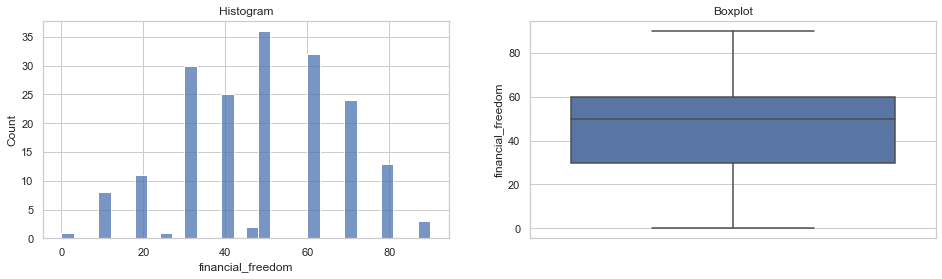


Skewness Value :  -0.10561230076892125


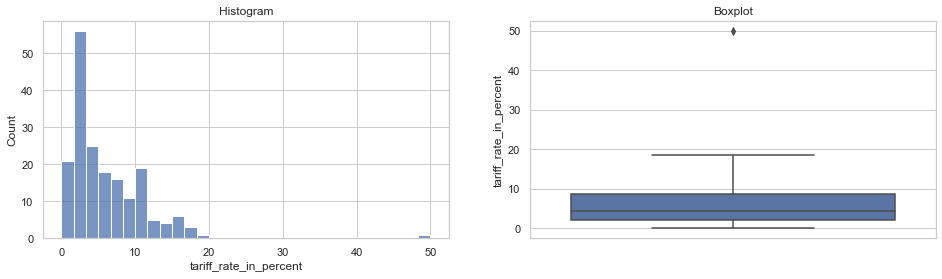


Skewness Value :  3.2387009245815235


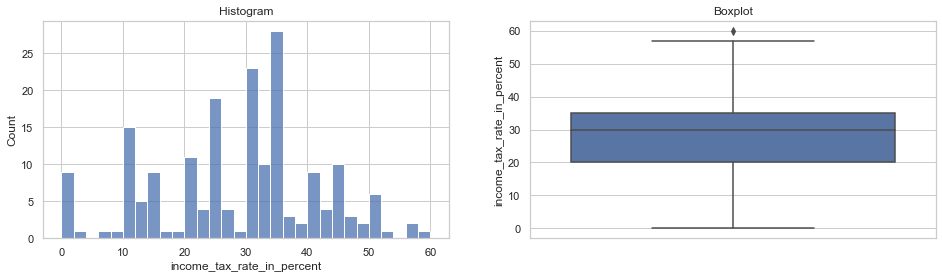


Skewness Value :  -0.23393571998541599


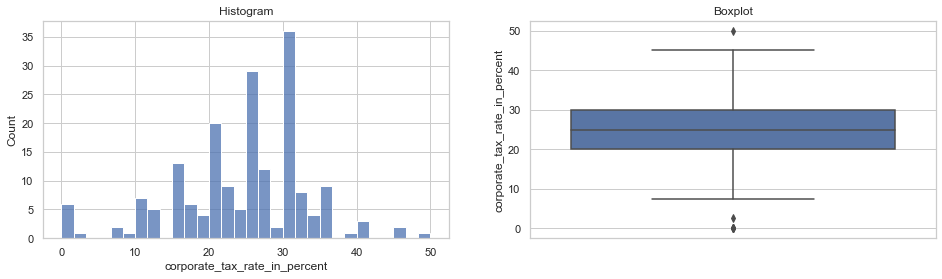


Skewness Value :  -0.49734325814804503


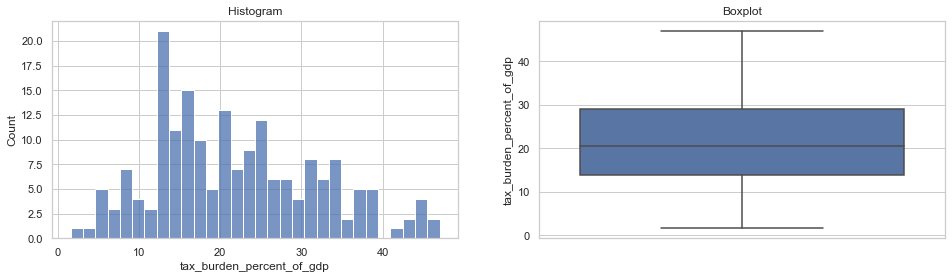


Skewness Value :  0.43784806859825776


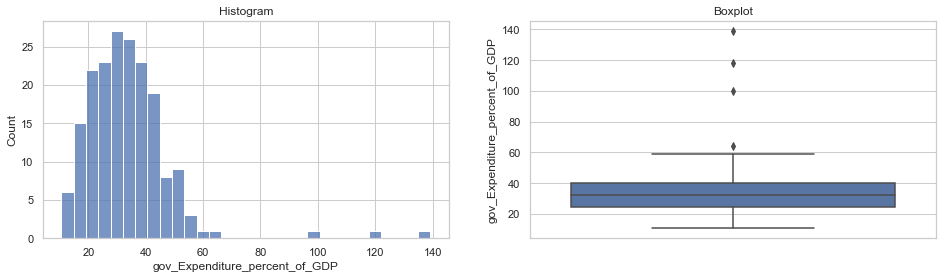


Skewness Value :  3.0885280712740615


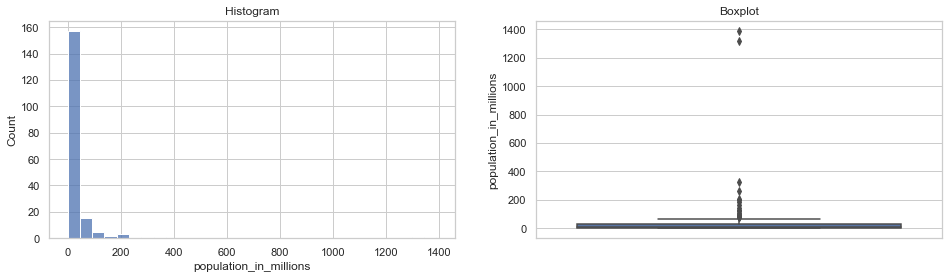


Skewness Value :  8.261600168194441


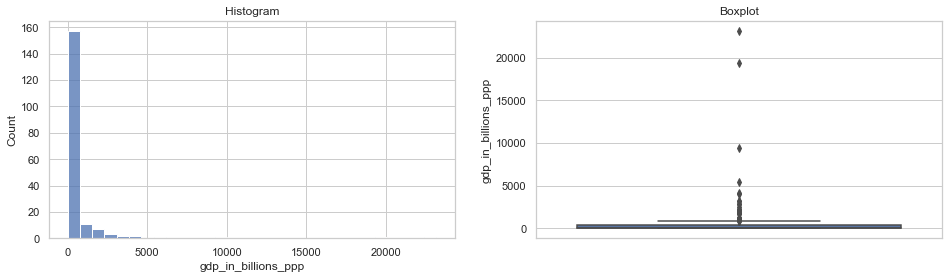


Skewness Value :  7.400574459903331


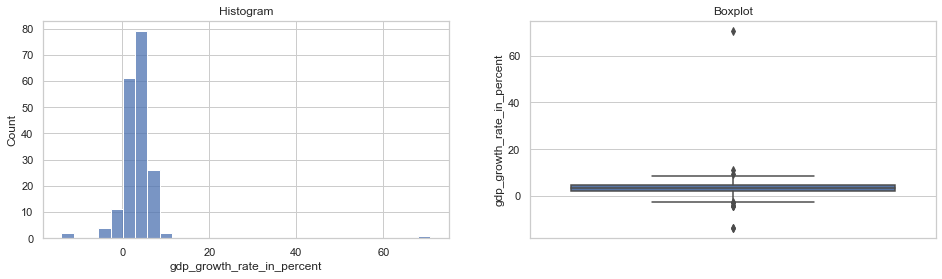


Skewness Value :  8.183933512246183


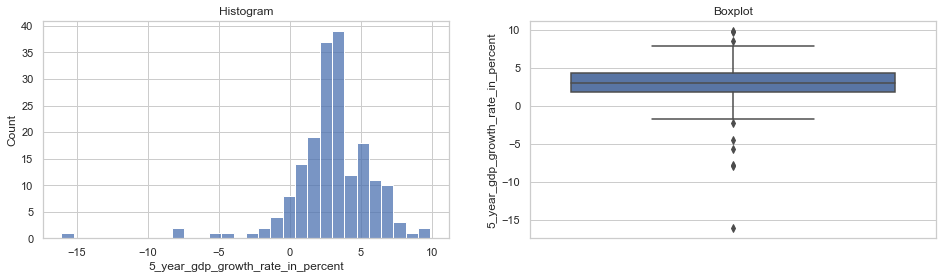


Skewness Value :  -1.9951030585949328


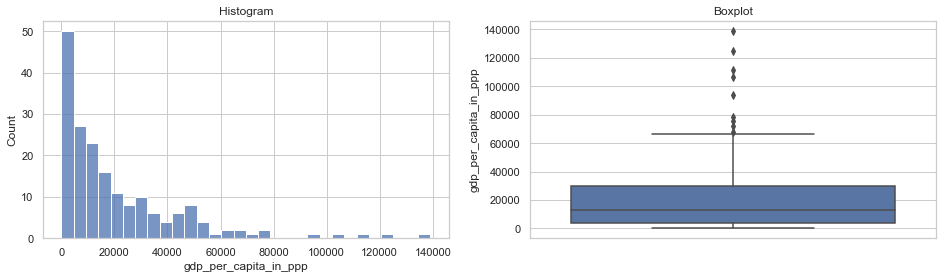


Skewness Value :  2.146331186459889


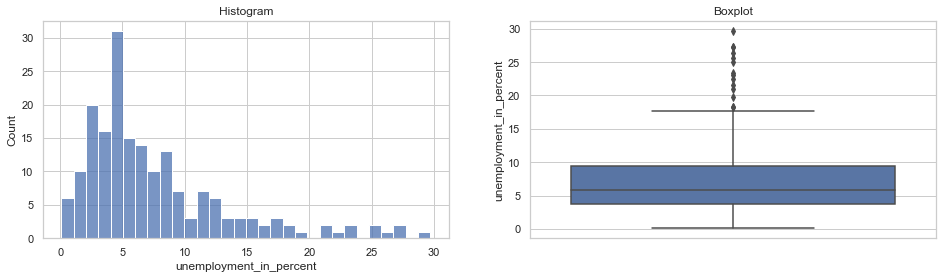


Skewness Value :  1.5724348936395862


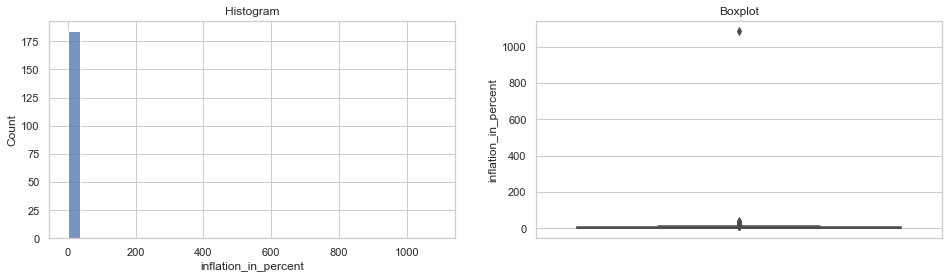


Skewness Value :  13.515387688529913


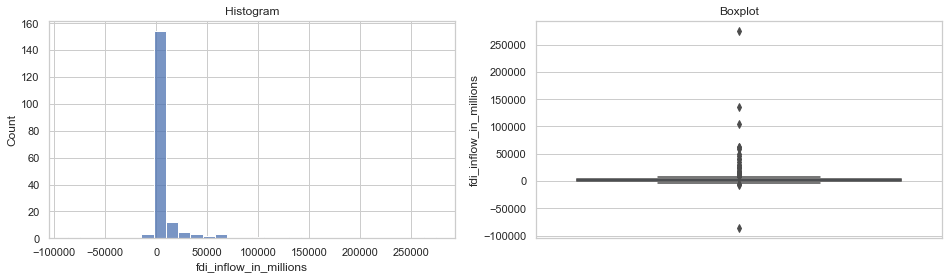


Skewness Value :  6.460982388444129


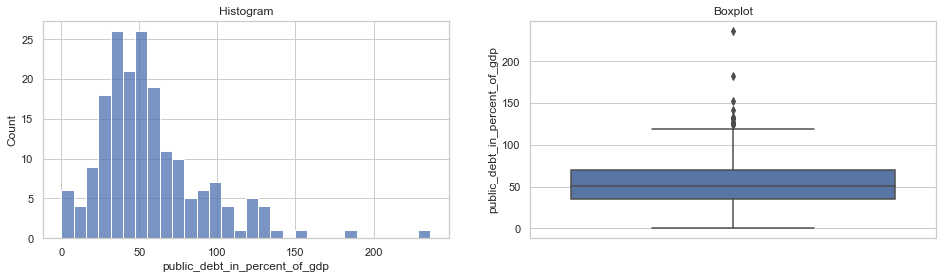


Skewness Value :  1.5515285336096856


In [97]:
for column in df.select_dtypes(include=np.number).columns: 
    diagnostic_plots(df, column)
    print('\nSkewness Value : ', df[column].skew())

In [98]:
def outlier_detector(df, column):
    #Creating upper and lower boundaries
    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    upper = df[column] >= (Q3+1.5*IQR)
    lower = df[column] <= (Q1-1.5*IQR)
    
    upper_rat = upper.sum()/upper.count()
    lower_rat = lower.sum()/lower.count()
    
    #checking how many value and percent outside the boundaries
    return column, upper_rat, lower_rat

def outlier_lister(df, columns):
    
    outlier_list = []
    print("The outliers are:")
    for a in columns:
        
        col, upper_rat, lower_rat = outlier_detector(df,a)
        
        if upper_rat + lower_rat != 0:
            print(col, 'with outliers ratio of :' ,upper_rat + lower_rat)
            outlier_list.append(a)
    
    return outlier_list

outlier_list = outlier_lister(df, col_num);

The outliers are:
2019_score with outliers ratio of : 0.026881720430107527
judical_effectiveness with outliers ratio of : 0.005376344086021506
government_integrity with outliers ratio of : 0.04838709677419355
tax_burden with outliers ratio of : 0.03763440860215054
gov_spending with outliers ratio of : 0.03763440860215054
business_freedom with outliers ratio of : 0.016129032258064516
labor_freedom with outliers ratio of : 0.016129032258064516
monetary_freedom with outliers ratio of : 0.03225806451612903
trade_freedom with outliers ratio of : 0.005376344086021506
investment_freedom with outliers ratio of : 0.021505376344086023
tariff_rate_in_percent with outliers ratio of : 0.005376344086021506
income_tax_rate_in_percent with outliers ratio of : 0.005376344086021506
corporate_tax_rate_in_percent with outliers ratio of : 0.053763440860215055
gov_Expenditure_percent_of_GDP with outliers ratio of : 0.021505376344086023
population_in_millions with outliers ratio of : 0.10215053763440861
gdp_

We can see that all the data contains outliers some outliers at low percentage, we wil handle this later.

# Data Preprocessing

Now we can get into data pre-processing. in this part, we will split the data for train, test and Infernce, and then we will handle outlier, and if any we will also handle missing values.

In [99]:
col_num = [col for col in col_num if col not in ['gdp_growth_rate_in_percent']]
col_num

['world_rank',
 'region_rank',
 '2019_score',
 'property_rights',
 'judical_effectiveness',
 'government_integrity',
 'tax_burden',
 'gov_spending',
 'fiscal_health',
 'business_freedom',
 'labor_freedom',
 'monetary_freedom',
 'trade_freedom',
 'investment_freedom',
 'financial_freedom',
 'tariff_rate_in_percent',
 'income_tax_rate_in_percent',
 'corporate_tax_rate_in_percent',
 'tax_burden_percent_of_gdp',
 'gov_Expenditure_percent_of_GDP',
 'population_in_millions',
 'gdp_in_billions_ppp',
 '5_year_gdp_growth_rate_in_percent',
 'gdp_per_capita_in_ppp',
 'unemployment_in_percent',
 'inflation_in_percent',
 'fdi_inflow_in_millions',
 'public_debt_in_percent_of_gdp']

In [100]:
col_cat

['country', 'region']

## Get Data for Model Inference

In [101]:
# Data Shape
df.shape

(186, 31)

Since we only got 300 data rows, I want to maximize the data for train so I choose to only take 10 rows for inference.

In [102]:
# Get Data for Model Inference
data_inf = df.sample(10, random_state=21)

# Remove Inference-Set from Dataset
data_train_test = df.drop(data_inf.index)

# Reset index and split data inference into X and y
data_inf = data_inf.reset_index(drop=True)

X_data_inf = data_inf.drop('5_year_gdp_growth_rate_in_percent', axis=1)
y_data_inf = data_inf['5_year_gdp_growth_rate_in_percent']

print('Test Size  : ', data_inf.shape)

Test Size  :  (10, 31)


From the data, I'll split 10 rows as inference. This will helps us check the performance of our model.

## Splitting Dataset

In [103]:
#Setting price as target (y) and other data as features(X) 
X = data_train_test.drop('5_year_gdp_growth_rate_in_percent', axis=1)
y = data_train_test['5_year_gdp_growth_rate_in_percent']

col_X = X.columns

#Splitting Train and Test datasets
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.10, random_state=99)

print('Train Size : ', X_train_raw.shape)
print('Test Size  : ', X_test.shape)
print('Inference Size  : ', X_data_inf.shape)

Train Size :  (158, 30)
Test Size  :  (18, 30)
Inference Size  :  (10, 30)


After we split the inference, then we need to split train and test datasets. I choose to take 10% data as test and 80% as train. once again i want to maximize train data in this model 

## Sampling

Our data doesn't need to be sampled because it the distribution of our target is quite normal.

In [104]:
X_train, y_train = X_train_raw, y_train_raw

## Handling Outlier

As I stated above, almost all the numerical data have outliers, and we already have outlier list. we will handle the all data with outlier except our target column

In [105]:
#Outliers column
outlier_list = [col for col in outlier_list if col not in ['5_year_gdp_growth_rate_in_percent']]
outlier_list

['2019_score',
 'judical_effectiveness',
 'government_integrity',
 'tax_burden',
 'gov_spending',
 'business_freedom',
 'labor_freedom',
 'monetary_freedom',
 'trade_freedom',
 'investment_freedom',
 'tariff_rate_in_percent',
 'income_tax_rate_in_percent',
 'corporate_tax_rate_in_percent',
 'gov_Expenditure_percent_of_GDP',
 'population_in_millions',
 'gdp_in_billions_ppp',
 'gdp_growth_rate_in_percent',
 'gdp_per_capita_in_ppp',
 'unemployment_in_percent',
 'inflation_in_percent',
 'fdi_inflow_in_millions',
 'public_debt_in_percent_of_gdp']

In [106]:
#Censoring with IQR
winsoriser_iqr = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables= outlier_list,
                          missing_values='ignore')

winsoriser_iqr.fit(X_train)

X_train_censored = winsoriser_iqr.transform(X_train)
X_test_censored = winsoriser_iqr.transform(X_test)

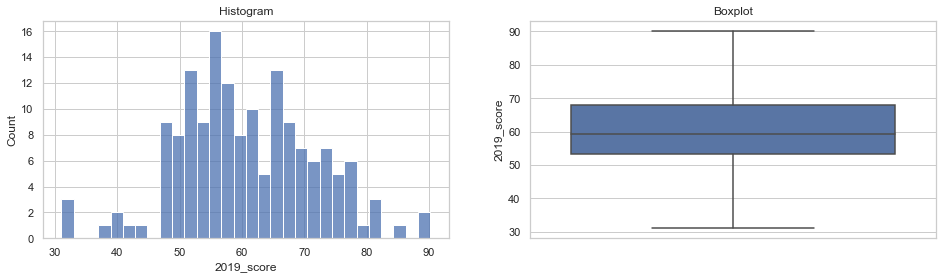


Skewness Value :  -0.5821932296987782


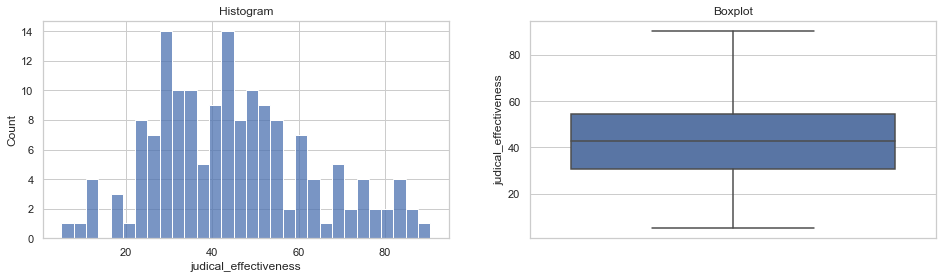


Skewness Value :  0.4632538629704934


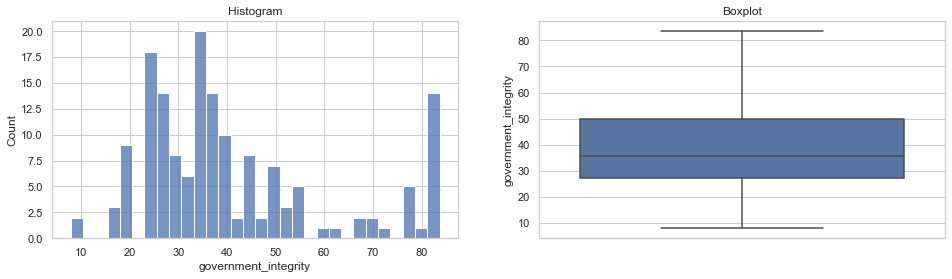


Skewness Value :  1.1504941913604638


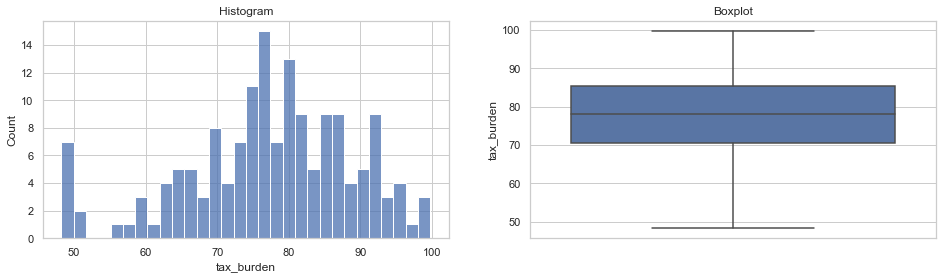


Skewness Value :  -1.5960893466261667


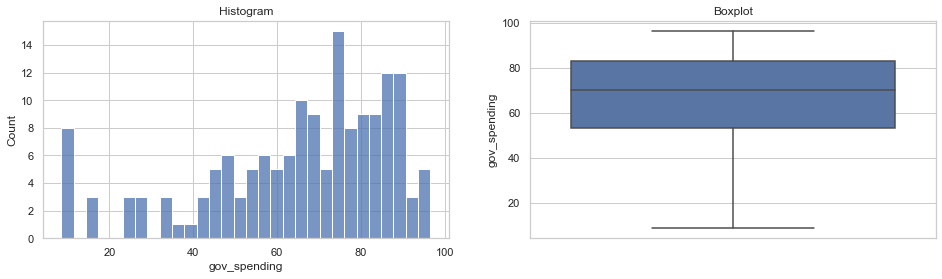


Skewness Value :  -1.1158638994563093


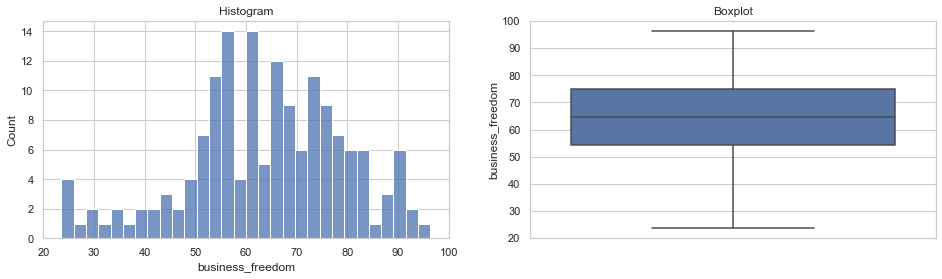


Skewness Value :  -0.6193793372095386


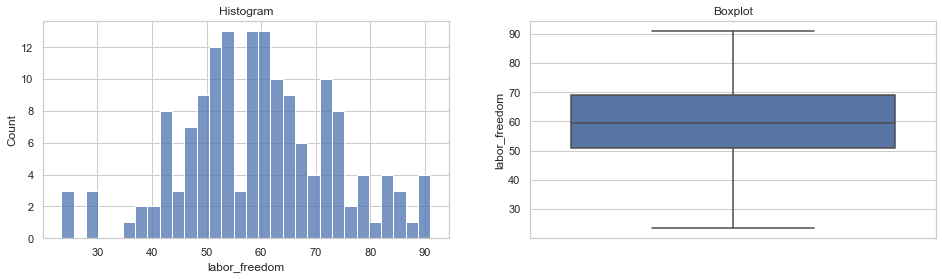


Skewness Value :  -0.3283659994465945


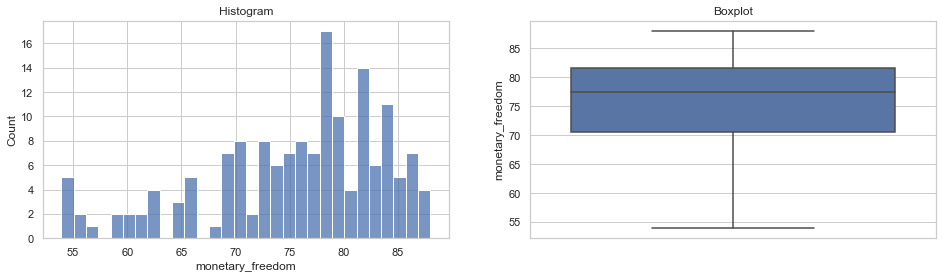


Skewness Value :  -3.487644509278892


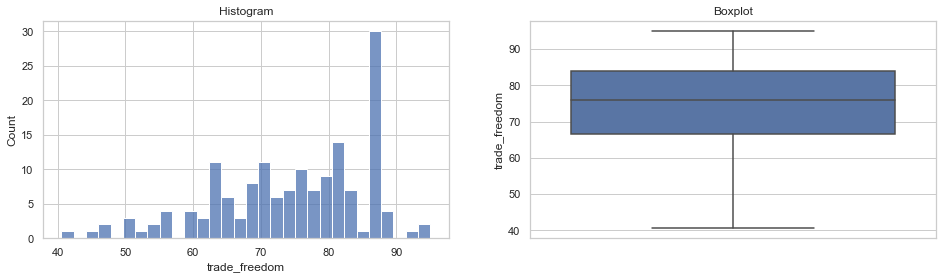


Skewness Value :  -1.7006480721060366


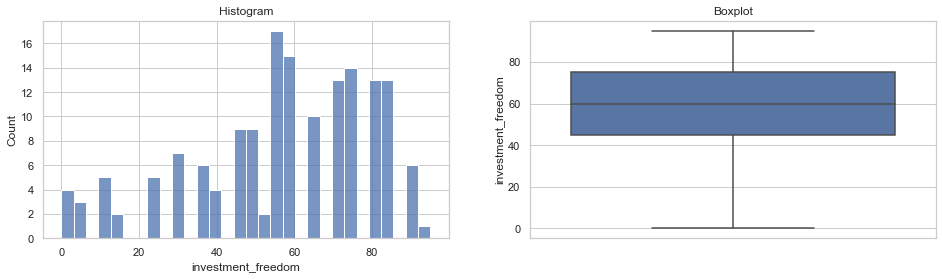


Skewness Value :  -0.7098595823653226


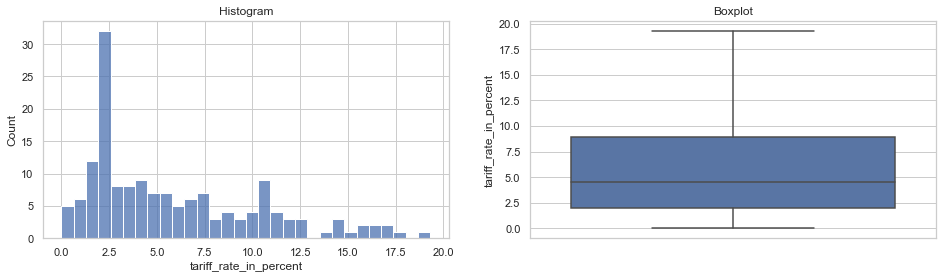


Skewness Value :  3.4085915289013036


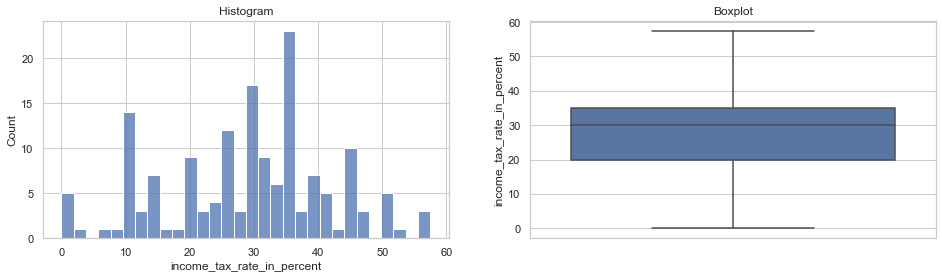


Skewness Value :  -0.21716302601433163


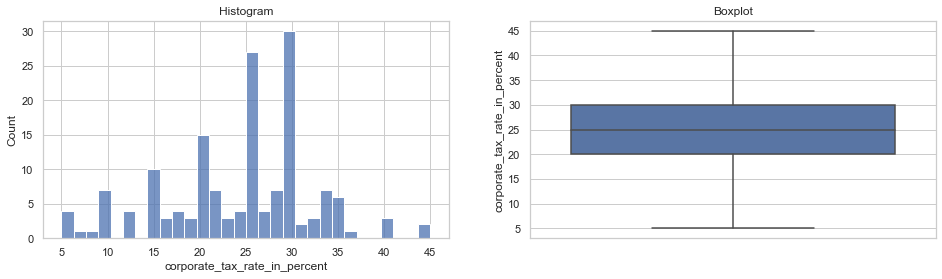


Skewness Value :  -0.4027538073734978


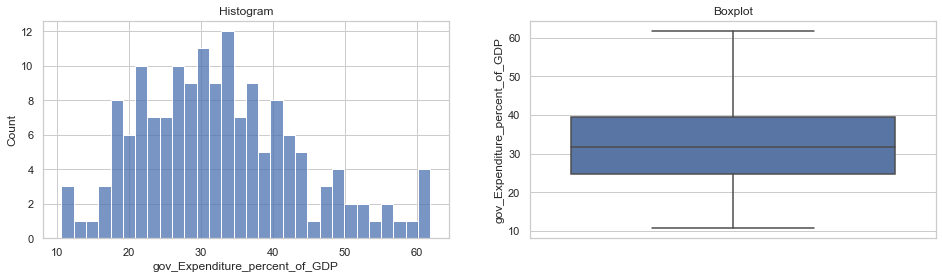


Skewness Value :  3.1747675986738595


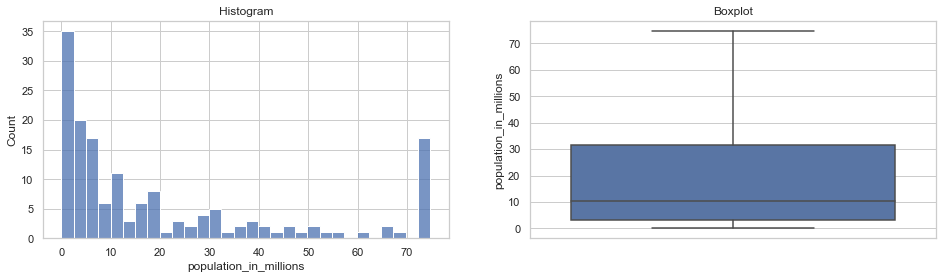


Skewness Value :  7.693914062472436


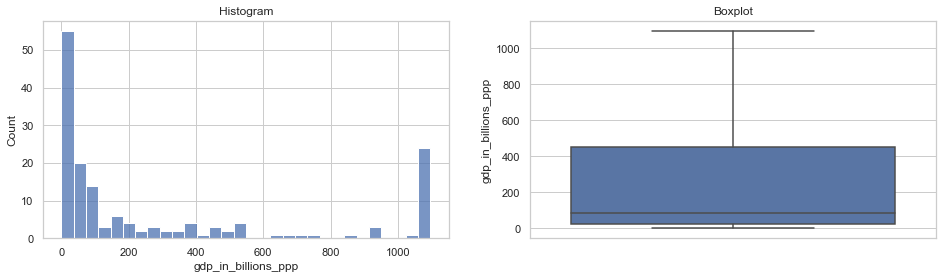


Skewness Value :  6.823226585990726


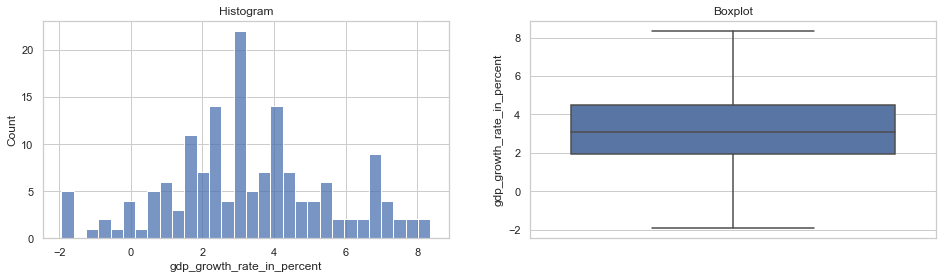


Skewness Value :  8.193412893153734


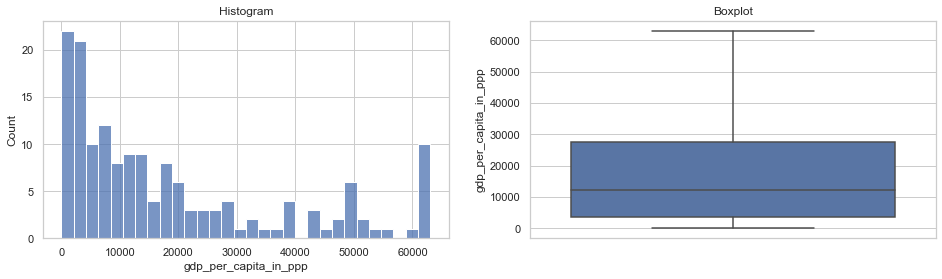


Skewness Value :  2.1950159788467123


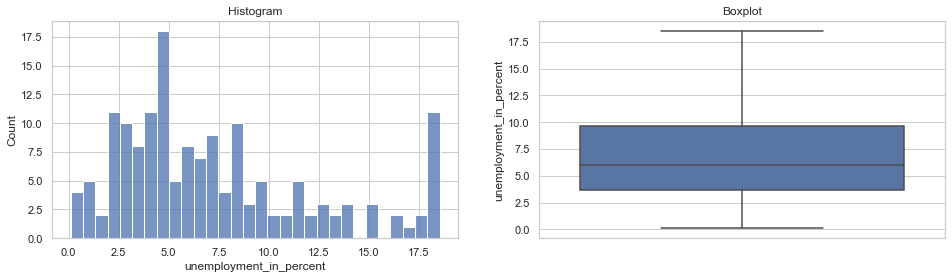


Skewness Value :  1.5619870889688523


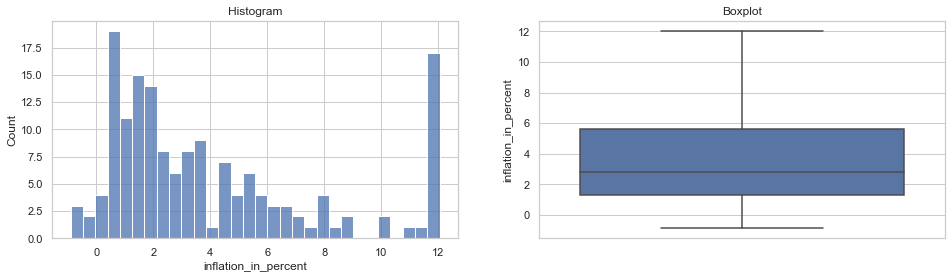


Skewness Value :  12.46158620870669


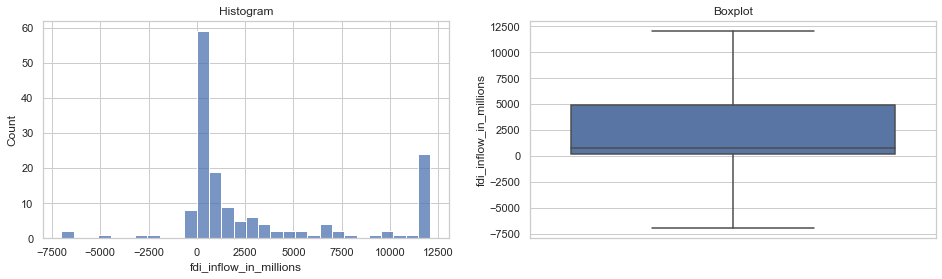


Skewness Value :  5.956772547671912


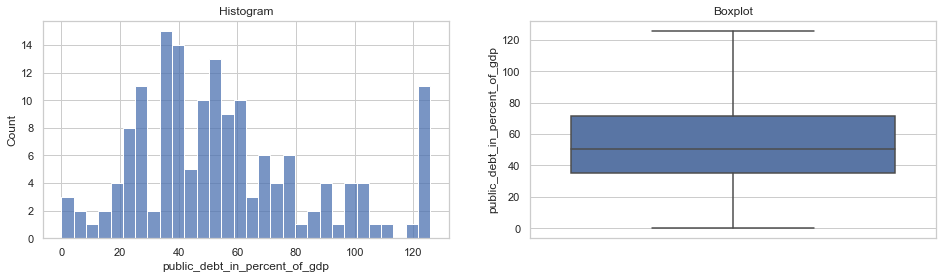


Skewness Value :  1.5764176280658766


In [107]:
for column in outlier_list: 
    diagnostic_plots(X_train_censored, column)
    print('\nSkewness Value : ', X_train[column].skew())

After handling, we can see that our outliers are removed our data.

As we can see, there is no missing values in our the data. so we dont need to handle missing values.

## Handling Missing Values

Since we already have complete data without missing values, and since our inference (presummably for future countries data) will not have missing values, we can skip missing values handling on this dataset.

In [108]:
# No need to handle missing values, data dont have Nan
X_train_censored_nonan = X_train_censored
X_test_censored_nonan = X_test_censored

## Feature Selection

### 1. Reasoning

As our analysis before, we can list our feature as:

In [109]:
#Printing features as previosly filtered
def column_type_check():    
    print('All Col :',df.columns.tolist())

    print('')

    print('Categorical features :')
    print('Ordinal :', col_cat_ordinal)
    print('Nominal :', col_cat_nominal)

    print('')

    print('Numerical features :')
    print('Normal :', col_num_normal)
    print('Skewed :', col_num_skewed)
    print('Exremely Skewed :', col_num_skewed_extreme)
    
column_type_check()    

All Col : ['region', 'world_rank', 'region_rank', '2019_score', 'property_rights', 'judical_effectiveness', 'government_integrity', 'tax_burden', 'gov_spending', 'fiscal_health', 'business_freedom', 'labor_freedom', 'monetary_freedom', 'trade_freedom', 'investment_freedom', 'financial_freedom', 'tariff_rate_in_percent', 'income_tax_rate_in_percent', 'corporate_tax_rate_in_percent', 'tax_burden_percent_of_gdp', 'gov_Expenditure_percent_of_GDP', 'country', 'population_in_millions', 'gdp_in_billions_ppp', 'gdp_growth_rate_in_percent', '5_year_gdp_growth_rate_in_percent', 'gdp_per_capita_in_ppp', 'unemployment_in_percent', 'inflation_in_percent', 'fdi_inflow_in_millions', 'public_debt_in_percent_of_gdp']

Categorical features :
Ordinal : ['country', 'region']
Nominal : []

Numerical features :
Normal : ['world_rank', 'region_rank', 'property_rights', 'judical_effectiveness', 'labor_freedom', 'financial_freedom', 'income_tax_rate_in_percent', 'corporate_tax_rate_in_percent', 'tax_burden_per

from the feature above I choose to drop, 'region', 'world_rank', 'region_rank' because we can makes sense of the rank and it its not that useful.

I'll also drop 'gdp_growth_rate_in_percent' and '5_year_gdp_growth_rate_in_percent' feature because both are the same metrics, only the 5 year is an average of 5 years growth and the non 5 years is the growth only for the year.

In [110]:
# Listing features to drop
to_drop = ['country', 'gdp_growth_rate_in_percent', '5_year_gdp_growth_rate_in_percent', 'region', 'world_rank', 'region_rank', '2019_score'
          , 'gdp_in_billions_ppp']

# Dropping features from column data type  lists 
col_num_process = [col for col in col_num if col not in to_drop]
col_cat_process = [col for col in col_cat if col not in to_drop]

col_num_normal = [col for col in col_num_normal if col not in to_drop]
col_num_skewed = [col for col in col_num_skewed if col not in to_drop]
col_num_skewed_extreme = [col for col in col_num_skewed_extreme if col not in to_drop]

col_cat_ordinal = [col for col in col_cat_ordinal if col not in to_drop]
col_cat_nominal = [col for col in col_cat_nominal if col not in to_drop]

In [111]:
col_cat_process

[]

In [112]:
#Listing dropped features
[col for col in df.columns.tolist() if col not in (col_cat_ordinal+col_cat_nominal+col_num_normal+col_num_skewed+col_num_skewed_extreme)]

['region',
 'world_rank',
 'region_rank',
 '2019_score',
 'country',
 'gdp_in_billions_ppp',
 'gdp_growth_rate_in_percent',
 '5_year_gdp_growth_rate_in_percent']

In [113]:
#Printing features as previosly filtered
column_type_check()

All Col : ['region', 'world_rank', 'region_rank', '2019_score', 'property_rights', 'judical_effectiveness', 'government_integrity', 'tax_burden', 'gov_spending', 'fiscal_health', 'business_freedom', 'labor_freedom', 'monetary_freedom', 'trade_freedom', 'investment_freedom', 'financial_freedom', 'tariff_rate_in_percent', 'income_tax_rate_in_percent', 'corporate_tax_rate_in_percent', 'tax_burden_percent_of_gdp', 'gov_Expenditure_percent_of_GDP', 'country', 'population_in_millions', 'gdp_in_billions_ppp', 'gdp_growth_rate_in_percent', '5_year_gdp_growth_rate_in_percent', 'gdp_per_capita_in_ppp', 'unemployment_in_percent', 'inflation_in_percent', 'fdi_inflow_in_millions', 'public_debt_in_percent_of_gdp']

Categorical features :
Ordinal : []
Nominal : []

Numerical features :
Normal : ['property_rights', 'judical_effectiveness', 'labor_freedom', 'financial_freedom', 'income_tax_rate_in_percent', 'corporate_tax_rate_in_percent', 'tax_burden_percent_of_gdp']
Skewed : ['fiscal_health', 'busine

### 2. Split between Numerical Columns and Categorical Columns

In code below we split the columns by our choosen class like we described above

In [114]:
#Spliting numerical columns into normal, skewed and extremely skewed
X_train_normal = X_train_censored_nonan[col_num_normal]
X_test_normal = X_test_censored_nonan[col_num_normal]

X_train_skewed = X_train_censored_nonan[col_num_skewed]
X_test_skewed = X_test_censored_nonan[col_num_skewed]

X_train_skewed_extreme = X_train_censored_nonan[col_num_skewed_extreme]
X_test_skewed_extreme = X_test_censored_nonan[col_num_skewed_extreme]

#Splitting categorical columns into ordinal and nominal
X_train_ordinal = X_train_censored_nonan[col_cat_ordinal]
X_test_ordinal = X_test_censored_nonan[col_cat_ordinal]

X_train_nominal = X_train_censored_nonan[col_cat_nominal]
X_test_nominal = X_test_censored_nonan[col_cat_nominal]

## Scaling and Encoding

### Numerical Data

In [115]:
#Scaling Algorithms
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

processed_data = []
for data_numerical in [X_train_normal, X_train_skewed, X_train_skewed_extreme]:
    if data_numerical.empty == False:
        if data_numerical.equals(X_train_normal):
            standard_scaler.fit(X_train_normal)
            X_train_normal_scaled = standard_scaler.transform(X_train_normal)
            X_test_normal_scaled = standard_scaler.transform(X_test_normal)
            processed_data.append('normal')
            
        if data_numerical.equals(X_train_skewed):
            minmax_scaler.fit(X_train_skewed)
            X_train_skewed_scaled = minmax_scaler.transform(X_train_skewed)
            X_test_skewed_scaled = minmax_scaler.transform(X_test_skewed)
            processed_data.append('skewed')
            
        if data_numerical.equals(X_train_skewed_extreme):
            robust_scaler.fit(X_train_skewed_extreme)
            X_train_skewed_extreme_scaled = robust_scaler.transform(X_train_skewed_extreme)
            X_test_skewed_extreme_scaled = robust_scaler.transform(X_test_skewed_extreme)
            processed_data.append('skewed_extreme')

We are using Standard Scaler for normally distributed data, MinMax scaler for skewed data and robust scaler for extremely skewed data. Each scaler are designed for specific function and we are splitting our data accordingly to achieve optimal value for our model.

### Categorical Data

In [116]:
# Feature Encoding using OrdinalEcoder and OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

for data_categorical in [X_train_ordinal, X_train_nominal]:
    if data_categorical.empty == False:
        if data_categorical.equals(X_train_ordinal):
            ordinal_encoder.fit(X_train_ordinal)
            X_train_ordinal_encoded = ordinal_encoder.transform(X_train_ordinal)
            X_test_ordinal_encoded = ordinal_encoder.transform(X_test_ordinal)
            processed_data.append('ordinal')
            
        if data_categorical.equals(X_train_nominal):
            onehot_encoder.fit(X_train_nominal)
            X_train_nominal_encoded = onehot_encoder.transform(X_train_nominal)
            X_test_nominal_encoded = onehot_encoder.transform(X_test_nominal)
            processed_data.append('nominal')

In [117]:
# Feature Encoding using OrdinalEcoder and OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

ordinal_encoder.fit(X_train_ordinal)
onehot_encoder.fit(X_train_nominal)

X_train_ordinal_encoded = ordinal_encoder.transform(X_train_ordinal)
X_test_ordinal_encoded = ordinal_encoder.transform(X_test_ordinal)

X_train_nominal_encoded = onehot_encoder.transform(X_train_nominal).toarray()
X_test_nominal_encoded = onehot_encoder.transform(X_test_nominal).toarray()

# Target Encoding using OrdinalEcoder
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

For categorical data, we are using ordinal encoder for ordinal data and OneHot encoder for nominal data. as the scaler, these encoder are design for are designed for specific function and we are splitting our data accordingly to achieve optimal value for our model.

### Concating Data for Modeling

In [118]:
#Checking proceseed columns:
processed_data

['normal', 'skewed', 'skewed_extreme']

In [119]:
#Concating data as array
X_train_final = np.concatenate([X_train_normal_scaled, X_train_skewed_scaled, X_train_skewed_extreme_scaled], axis=1)
X_test_final = np.concatenate([X_test_normal_scaled, X_test_skewed_scaled, X_test_skewed_extreme_scaled], axis=1)

In [120]:
#Defining column names
column_names = [col_num_normal+col_num_skewed+col_num_skewed_extreme+col_cat_ordinal+['onehot']*0]

In [121]:
#Model to dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=column_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=column_names)

After making sure that all of our manual pre=processing is robust, we can continue to Pipline to wrap our model using all transformer above

## Creating Pipeline

Because we want to analyze multiple models, we can use pipeline to make the process easier and more automated. first I will re-define all the codes that we study beforehand.

In [122]:
# Outlier Handling
winsorizer_iqr = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables= outlier_list,
                          missing_values='ignore')
# Scaling Algorithms
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Feature Encoding using OrdinalEcoder and OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

# Preprocessing column transformer
normalizer = ColumnTransformer(transformers=[
        ("normal", standard_scaler, col_num_normal ),
        ("num_skewed", minmax_scaler, col_num_skewed),
        ("num_skewed_extreme", robust_scaler, col_num_skewed_extreme)])

Next we'll define each pipeline for every algorithm that we would use

In [123]:
#Creating pipeline for every algorithms
pipe_lr = make_pipeline(winsorizer_iqr, normalizer, LinearRegression())
pipe_dt = make_pipeline(winsorizer_iqr, normalizer, DecisionTreeRegressor())
pipe_svr = make_pipeline(winsorizer_iqr, normalizer, SVR())
pipe_rf = make_pipeline(winsorizer_iqr, normalizer, RandomForestRegressor())
pipe_pf = make_pipeline(winsorizer_iqr, normalizer, PolynomialFeatures(degree=2), LinearRegression())

#pipeline dictionary by name
pipes_dict = {
    'LinearRegression': pipe_lr,
    'DecisionTreeRegressor': pipe_dt,    
    'SVR': pipe_svr,
    'RandomForestRegressor': pipe_rf,    
    'PolynomialFeatures': pipe_pf
}

In [126]:
pred_dict={}
for name, pipe in pipes_dict.items():
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    pred_dict[name] = [y_train_pred,y_test_pred]
    
    print('-'*40,name,'-'*40)
    
    print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
    print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

    print('MSE train = ', mean_squared_error(y_train, y_train_pred))
    print('MSE test = ', mean_squared_error(y_test, y_test_pred))
    
    print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    print('r2score train = ', r2_score(y_train, y_train_pred))
    print('r2score test = ', r2_score(y_test, y_test_pred))



---------------------------------------- LinearRegression ----------------------------------------
MAE train =  1.5876676581500526
MAE test =  2.3098860762286524
MSE train =  5.052695150687967
MSE test =  10.248282506093645
RMSE train =  2.247820088594273
RMSE test =  3.2012938799950317
r2score train =  0.4029978978195561
r2score test =  -1.2041658028028603
---------------------------------------- DecisionTreeRegressor ----------------------------------------
MAE train =  0.0
MAE test =  1.9555555555555557
MSE train =  0.0
MSE test =  7.504444444444445
RMSE train =  0.0
RMSE test =  2.7394241081739144
r2score train =  1.0
r2score test =  -0.614030429356629
---------------------------------------- SVR ----------------------------------------
MAE train =  1.2950500340633548
MAE test =  1.6520077377153664
MSE train =  5.925606449457249
MSE test =  4.855450394013963
RMSE train =  2.4342568577406225
RMSE test =  2.2035086553072496
r2score train =  0.2998589066790819
r2score test =  -0.04429

As We can see, our model are very bad in predicting test datasets, the r2 score int test are negative compared to the high r2 train score. and this si an indication of bad overfitting.

# Model Training

## Model Optimization

### RandomSearch for All Model

Since I want to find inital optimiziation paramters for the models, I'll do random search for all the models. First we need to define our parameter grid to input into random search.

In [127]:
pipes_dict = {
    'LinearRegression': pipe_lr,
    'DecisionTreeRegressor': pipe_dt,    
    'SVR': pipe_svr,
    'RandomForestRegressor': pipe_rf,    
    'PolynomialFeatures': pipe_pf
}

In [128]:
# Parameters to execute for model optimization
param_grid_lr = {}

param_grid_dt = {"decisiontreeregressor__splitter":["best","random"],
                 "decisiontreeregressor__max_depth" : [1,3,5,7,9,11,12],
                 "decisiontreeregressor__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
                 "decisiontreeregressor__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                 "decisiontreeregressor__max_features":["auto","log2","sqrt",None],
                 "decisiontreeregressor__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

param_grid_svr = {'svr__C': [0.1, 1, 10, 100, 1000],
                  'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'svr__kernel': ['linear', 'rbf']
                 }

param_grid_rf = {'randomforestregressor__max_depth': [10, 30, 50, 70, 90, 100],
                 'randomforestregressor__min_samples_leaf': [1, 2, 4, 8, 12],
                 'randomforestregressor__n_estimators': [10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],              
                 #'randomforestclassifier__bootstrap': [True, False],
                 'randomforestregressor__min_samples_split': [2, 5, 10]
                }

param_grid_pf = {'polynomialfeatures__degree' : [2,4]
                }

# Parameters dictionary by pipe
pipe_param_dict = {
    pipe_lr: param_grid_lr,
    pipe_dt: param_grid_dt,
    pipe_svr: param_grid_svr,
    #pipe_pf: param_grid_pf, #very long train time
    pipe_rf: param_grid_rf
    }

In [129]:
# Defining Function for gridsearh
def random_search_function(n_iter, cv, random_state):
    
    random_search_result = {}
    
    for pipe, param in pipe_param_dict.items():
        rand_s = RandomizedSearchCV(estimator = pipe, param_distributions = param, n_iter = n_iter, cv = cv, verbose=2, random_state=random_state, n_jobs = -1)
        rand_s.fit(X_train,y_train)
        random_search_result[pipe] = rand_s.best_params_
    
    return random_search_result

In [221]:
random_search_result = random_search_function(n_iter=100, cv=3, random_state=67)

C:\Users\nurfa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\nurfa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
165 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nurfa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nurfa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\nurfa\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\nurfa\anaconda3\lib\site-p

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


We can see some warning here but we can ignore those

### Optimal Result based on RandomSearch

In [229]:
# Printing optimum random search
for result in random_search_result.values():
    print('-'*20)
    print(result)

--------------------
{}
--------------------
{'decisiontreeregressor__splitter': 'best', 'decisiontreeregressor__min_weight_fraction_leaf': 0.4, 'decisiontreeregressor__min_samples_leaf': 10, 'decisiontreeregressor__max_leaf_nodes': 10, 'decisiontreeregressor__max_features': 'log2', 'decisiontreeregressor__max_depth': 12}
--------------------
{'svr__kernel': 'rbf', 'svr__gamma': 0.01, 'svr__C': 10}
--------------------
{'randomforestregressor__n_estimators': 50, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_depth': 100}


let's store the results for further analysis

In [130]:
# Storing Search parameters to avoid running model repeatedly. 
random_search_result = {}
random_search_result[pipe_dt] = {'decisiontreeregressor__splitter': 'best', 'decisiontreeregressor__min_weight_fraction_leaf': 0.4, 'decisiontreeregressor__min_samples_leaf': 10, 'decisiontreeregressor__max_leaf_nodes': 10, 'decisiontreeregressor__max_features': 'log2', 'decisiontreeregressor__max_depth': 12}
random_search_result[pipe_svr] = {'svr__kernel': 'rbf', 'svr__gamma': 0.01, 'svr__C': 10}
random_search_result[pipe_rf] = {'randomforestregressor__n_estimators': 50, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_depth': 100}
random_search_result[pipe_pf] = {}
random_search_result[pipe_lr] = {}

In [131]:
#Reconfrim dict
pipe_param_dict = {
    pipe_lr: param_grid_lr,
    pipe_dt: param_grid_dt,
    pipe_svr: param_grid_svr,
    pipe_pf: param_grid_pf,
    pipe_rf: param_grid_rf
    }

### Apply Parameters for Model Prediction

In [132]:
# Applying paramters to every algorithm
prediction_result = {}

for pipe in pipe_param_dict:
    nested_dict = {}
    pipe.set_params(**random_search_result[pipe])
    
    pipe.fit(X_train, y_train)
    
    X_train_pred = pipe.predict(X_train)
    X_test_pred = pipe.predict(X_test)
    X_data_inf_pred = pipe.predict(X_data_inf)
    
    nested_dict['X_train_pred'] = X_train_pred
    nested_dict['X_test_pred'] = X_test_pred
    
    prediction_result[pipe] = nested_dict;

# Model Evaluation

In [133]:
def evaluation_random_search(pipe):
   
    print('MAE train = ', mean_absolute_error(y_train, prediction_result[pipe]['X_train_pred']))
    print('MAE test = ', mean_absolute_error(y_test, prediction_result[pipe]['X_test_pred']))

    print('MSE train = ', mean_squared_error(y_train, prediction_result[pipe]['X_train_pred']))
    print('MSE test = ', mean_squared_error(y_test, prediction_result[pipe]['X_test_pred']))
    
    print('RMSE train = ', np.sqrt(mean_squared_error(y_train, prediction_result[pipe]['X_train_pred'])))
    print('RMSE test = ', np.sqrt(mean_squared_error(y_test, prediction_result[pipe]['X_test_pred'])))

    print('r2score train = ', r2_score(y_train, prediction_result[pipe]['X_train_pred']))
    print('r2score test = ', r2_score(y_test, prediction_result[pipe]['X_test_pred']))

In [134]:
for name, pipe in pipes_dict.items():
    print('-'*100,'\n')
    print('Classification Result for', name, ':')
    evaluation_random_search(pipe)

---------------------------------------------------------------------------------------------------- 

Classification Result for LinearRegression :
MAE train =  1.5876676581500526
MAE test =  2.3098860762286524
MSE train =  5.052695150687967
MSE test =  10.248282506093645
RMSE train =  2.247820088594273
RMSE test =  3.2012938799950317
r2score train =  0.4029978978195561
r2score test =  -1.2041658028028603
---------------------------------------------------------------------------------------------------- 

Classification Result for DecisionTreeRegressor :
MAE train =  1.8489780857557414
MAE test =  1.599862758014932
MSE train =  7.627340583879522
MSE test =  5.6939989271257
RMSE train =  2.7617640347936177
RMSE test =  2.3862101598823395
r2score train =  0.0987902046688317
r2score test =  -0.22464595495919304
---------------------------------------------------------------------------------------------------- 

Classification Result for SVR :
MAE train =  1.3078405612536335
MAE test =  

In [138]:
intercept = pipe_lr['linearregression'].intercept_
slope = pipe_lr['linearregression'].coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  5.143905280438061
Slope :  [ 1.22548664 -0.39592515 -0.18482874  0.01364304  0.55989552 -0.76151805
  0.29240682 -1.27794713 -0.82176353 -0.95678905  1.2786262   1.20034792
 -3.50243839  1.03845634 -0.37489247  0.10762998 -4.25597143  0.3093249
 -2.49512006 -0.84413238  0.18984161  0.13566517 -0.50823701]


In [139]:
dcolumn_names

[['property_rights',
  'judical_effectiveness',
  'labor_freedom',
  'financial_freedom',
  'income_tax_rate_in_percent',
  'corporate_tax_rate_in_percent',
  'tax_burden_percent_of_gdp',
  'fiscal_health',
  'business_freedom',
  'investment_freedom',
  'government_integrity',
  'tax_burden',
  'gov_spending',
  'monetary_freedom',
  'trade_freedom',
  'tariff_rate_in_percent',
  'gov_Expenditure_percent_of_GDP',
  'population_in_millions',
  'gdp_per_capita_in_ppp',
  'unemployment_in_percent',
  'inflation_in_percent',
  'fdi_inflow_in_millions',
  'public_debt_in_percent_of_gdp']]

In [ ]:
#Reconfrim dict
pipe_param_dict = {
    pipe_lr: param_grid_lr,
    pipe_dt: param_grid_dt,
    pipe_svr: param_grid_svr,
    pipe_pf: param_grid_pf,
    pipe_rf: param_grid_rf
    }

We can see from our evaluations, all of the model seems to show signs of slight overfitting. the best train score that we can get si from polynomial features but it's predicttion is very bad. Random Forest Regressor alos have a quite high train score but it got a very bad test r2 test score at -0.06

# Model Inference

In [245]:
# Export Model
with open('model_rf.pkl', 'wb') as pipe_file_rf:
    pickle.dump(pipe_rf, pipe_file_rf)
    
with open('model_pf.pkl', 'wb') as pipe_file_pf:
    pickle.dump(pipe_pf, pipe_file_pf)

In [242]:
y_data_inf_pred = pipe_rf.predict(X_data_inf)
pd.DataFrame(np.array([y_data_inf_pred, y_data_inf]).T, columns=('Prediction', 'Real_Value'))

,Prediction,Real_Value
0,2.778289,-0.3
1,3.371357,2.5
2,3.404055,-1.3
3,0.960157,1.2
4,-3.615238,2.2
5,3.811916,-0.7
6,2.041633,1.1
7,2.800369,-0.6
8,3.306000,-5.6
9,2.632414,3.1


## Inference Evaluation

We can see that we successfully apply our model to inference. the perdicition is very bad though and our model is not reliable.

## Conclusion

Exploring the data we can see that perdicting growth with one year economics and several metrics data is very hard. we tried several linear regression models but the result of our exploration is very bad. altough several models can achieve a quite high result in train data set, the test dataset prediction is still really bad.

This can happened beacause our model is not incorporating data from previous years and growth is an indicator that measure improvement compared to last year.

We should also include more metrics that measure goverment investment and development because those data seems to be the one that are most corellated.